# Import libraries and read data

In [165]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [166]:
df=pd.read_csv("Knight/train.csv")
df.head()

user_name    country  \
0            NaN  Australia   
1  @wawinereport         US   
2            NaN      Italy   
3     @vossroger     France   
4     @vossroger     France   

                                        review_title  \
0  Andrew Peace 2007 Peace Family Vineyard Chardo...   
1  North by Northwest 2014 Red (Columbia Valley (...   
2                  Renato Ratti 2007 Conca  (Barolo)   
3  Domaine l'Ancienne Cure 2010 L'Abbaye White (B...   
4  Château du Cèdre 2012 Le Cèdre Vintage Malbec ...   

                                  review_description            designation  \
0  Classic Chardonnay aromas of apple, pear and h...  Peace Family Vineyard   
1  This wine is near equal parts Syrah and Merlot...                    NaN   
2  Barolo Conca opens with inky dark concentratio...                  Conca   
3  It's impressive what a small addition of Sauvi...               L'Abbaye   
4  This ripe, sweet wine is rich and full of drie...       Le Cèdre Vintage   

   points  price          province                 region_1         region_2  \
0      83   10.0   Australia Other  South Eastern Australia              NaN   
1      89   15.0        Washington     Columbia Valley (WA)  Columbia Valley   
2      94   80.0          Piedmont                   Barolo              NaN   
3      87   22.0  Southwest France             Bergerac Sec              NaN   
4      88   33.0      France Other           Vin de Liqueur              NaN   

                    winery                     variety  
0             Andrew Peace                  Chardonnay  
1       North by Northwest                   Red Blend  
2             Renato Ratti                    Nebbiolo  
3  Domaine l'Ancienne Cure  Bordeaux-style White Blend  
4         Château du Cèdre                      Malbec

## Look for duplicate reviews and drop duplicates

In [82]:
pd.concat(g for _, g in df.groupby("review_description") if len(g) > 1)

user_name      country  \
53655  @wawinereport           US   
73628  @wawinereport           US   
64962  @wawinereport           US   
81272  @wawinereport           US   
32203     @vossroger       France   
45297     @vossroger       France   
32312     @vossroger       France   
69677     @vossroger       France   
31849     @vossroger       France   
65370     @vossroger       France   
344       @vossroger       France   
35383     @vossroger       France   
76877     @vossroger       France   
79329     @vossroger       France   
21199     @vossroger       France   
32549     @vossroger       France   
11525        @vboone           US   
56557        @vboone           US   
42028            NaN        Italy   
80121            NaN        Italy   
22806     @vossroger     Portugal   
37305     @vossroger     Portugal   
21166        @vboone           US   
45915        @vboone           US   
45377            NaN           US   
76828            NaN           US   
9817         @vboone           US   
14381        @vboone           US   
30522        @vboone           US   
80065        @vboone           US   
...              ...          ...   
56445    @paulgwine            US   
65591    @paulgwine            US   
12769        @vboone           US   
55867        @vboone           US   
38311    @paulgwine            US   
58042    @paulgwine            US   
20634     @vossroger       France   
65303     @vossroger       France   
12553    @paulgwine            US   
73744    @paulgwine            US   
49224        @vboone           US   
60094        @vboone           US   
21966            NaN      Germany   
36695            NaN      Germany   
17406            NaN      Germany   
74043            NaN      Germany   
24093            NaN      Germany   
82452            NaN      Germany   
2866             NaN      Germany   
32830            NaN      Germany   
4719   @mattkettmann           US   
75931  @mattkettmann           US   
29937            NaN           US   
30180            NaN           US   
48067            NaN           US   
64217            NaN           US   
43796         @JoeCz  New Zealand   
58807         @JoeCz  New Zealand   
4688     @paulgwine        Canada   
11494    @paulgwine        Canada   

                                            review_title  \
53655         Roza Ridge 2010 Malbec (Rattlesnake Hills)   
73628         Roza Ridge 2010 Malbec (Rattlesnake Hills)   
64962  Ross Andrew 2013 Meadow Rosé (Columbia Valley ...   
81272  Ross Andrew 2013 Meadow Rosé (Columbia Valley ...   
32203  Château Haut-Sarpe 2008 Barrel sample  (Saint-...   
45297  Château Haut-Sarpe 2008 Barrel sample  (Saint-...   
32312  Château Bertineau Saint-Vincent 2008 Barrel sa...   
69677  Château Bertineau Saint-Vincent 2008 Barrel sa...   
31849    Château Cissac 2010 Barrel sample  (Haut-Médoc)   
65370    Château Cissac 2010 Barrel sample  (Haut-Médoc)   
344    Château Branaire-Ducru 2008 Barrel sample  (Sa...   
35383  Château Branaire-Ducru 2008 Barrel sample  (Sa...   
76877    Château Caillou 2006 Barrel sample  (Sauternes)   
79329    Château Caillou 2006 Barrel sample  (Sauternes)   
21199  Château Gruaud Larose 2012 Barrel Sample  (Sai...   
32549  Château Grand-Puy-Lacoste 2012 Barrel Sample  ...   
11525  Rombauer 2012 Atlas Peak Vineyard Cabernet Sau...   
56557  Rombauer 2012 Atlas Peak Vineyard Cabernet Sau...   
42028          Cottanera 2011 Barbazzale White (Sicilia)   
80121          Cottanera 2011 Barbazzale White (Sicilia)   
22806  Adega Cooperativa do Cartaxo 2014 Bridão Priva...   
37305  Adega Cooperativa do Cartaxo 2014 Bridão Priva...   
21166  Seghesio 2012 San Lorenzo Estate Red (Alexande...   
45915  Seghesio 2012 San Lorenzo Estate Red (Alexande...   
45377  Crane Brothers 2006 Brodatious Crane Ranch Vin...   
76828  Crane Brothers 2006 Brodatious Crane Ranch Vin...   
9817    Y Rousseau 2012 Milady Chardonnay (Mount Veeder)   
14381   Y Rousseau 2012 Milady Chard

In [167]:
df.shape

(82657, 12)

In [175]:
df=df.drop_duplicates(['review_description'])
df.shape

(77628, 12)

In [176]:
x=df.variety.unique()
print(x)

['Chardonnay' 'Red Blend' 'Nebbiolo' 'Bordeaux-style White Blend' 'Malbec'
 'Cabernet Sauvignon' 'Zinfandel' 'Pinot Noir' 'Sauvignon Blanc' 'Gamay'
 'Grüner Veltliner' 'Bordeaux-style Red Blend' 'Sangiovese' 'Syrah'
 'White Blend' 'Cabernet Franc' 'Portuguese Red' 'Portuguese White'
 'Rhône-style Red Blend' 'Rosé' 'Champagne Blend' 'Merlot' 'Riesling'
 'Sparkling Blend' 'Pinot Grigio' 'Tempranillo' 'Pinot Gris'
 'Gewürztraminer']


# Using text processing

## Review titles

### EXTRACTING USEFUL INFORMATION FROM REVIEW TITLE

In [177]:
df1=df.filter(['review_title','variety'], axis=1)

In [171]:
c=0
c1=0
c2=0
c4=0
c5=0
c6=0
for index,rows in df1.iterrows():
    j="xxxxx"
    c3=0
    for i in x:
        if(i in rows['review_title']):
                c3+=1
                j=i
    if(c3==0):
        c4+=1
    elif(c3==1):
        if(j==rows['variety']):
            c+=1
        else:
            print(j,rows['variety'])
            c1+=1
    elif(c3>1):
        if(j==rows['variety']):
            c2+=1
        else:
            c5+=1
    
print(c4,c,c1,c2,c5)

Rosé Sparkling Blend
Rosé Sparkling Blend
Merlot Bordeaux-style Red Blend
Rosé Champagne Blend
Chardonnay White Blend
Merlot Portuguese Red
Cabernet Franc Red Blend
Rosé Champagne Blend
Rosé Sparkling Blend
Tempranillo White Blend
Rosé Champagne Blend
Sauvignon Blanc Bordeaux-style White Blend
Sangiovese Red Blend
Chardonnay White Blend
Rosé Champagne Blend
Chardonnay Sparkling Blend
Rosé Sparkling Blend
Sauvignon Blanc White Blend
Rosé Sparkling Blend
Rosé Sparkling Blend
Rosé Sparkling Blend
Rosé Sparkling Blend
Rosé Champagne Blend
Rosé Sparkling Blend
Rosé Rhône-style Red Blend
Rosé Sparkling Blend
Cabernet Sauvignon Red Blend
Cabernet Sauvignon Red Blend
Rosé Champagne Blend
Syrah Portuguese Red
Rosé Champagne Blend
Rosé Sparkling Blend
Rosé Champagne Blend
Rosé Sparkling Blend
Rosé Champagne Blend
Rosé Sparkling Blend
Chardonnay White Blend
Rosé Sparkling Blend
Rosé Champagne Blend
Rosé Sparkling Blend
Rosé Sparkling Blend
Rosé Champagne Blend
Tempranillo Red Blend
Rosé Sparkling

Rosé Sparkling Blend
Rosé Sparkling Blend
Rosé Champagne Blend
Rosé Champagne Blend
Rosé Champagne Blend
Rosé Champagne Blend
Rosé Champagne Blend
Merlot Portuguese Red
Rosé Champagne Blend
Rosé Sparkling Blend
Rosé Champagne Blend
Rosé Bordeaux-style Red Blend
Rosé Champagne Blend
Malbec Red Blend
Rosé Sparkling Blend
Rosé Sparkling Blend
Rosé Sparkling Blend
Rosé Champagne Blend
Rosé Sparkling Blend
Rosé Sparkling Blend
Syrah Red Blend
Rosé Champagne Blend
Cabernet Franc Red Blend
Rosé Champagne Blend
Rosé Champagne Blend
Rosé Sparkling Blend
Rosé Sparkling Blend
Rosé Sparkling Blend
Rosé Sparkling Blend
Rosé Sparkling Blend
Rosé Sparkling Blend
Rosé Champagne Blend
Rosé Sparkling Blend
Syrah Portuguese Red
Rosé Sparkling Blend
Cabernet Sauvignon Red Blend
Rosé Champagne Blend
Rosé Champagne Blend
Pinot Noir Red Blend
Rosé Sparkling Blend
Rosé Sparkling Blend
Syrah Rhône-style Red Blend
Rosé Champagne Blend
Merlot Bordeaux-style Red Blend
Cabernet Franc Red Blend
Rosé Sparkling Blend

KeyboardInterrupt: 

We find that often, the review title contains the name of the wine. Analysis of the training dataset shows that out of 77628 entries, 48450 contain the name of one or more wine in the review title. We do not consider those entries which have more than one wine in the title. This gives us 47783 entries with a single wine type appearing in the review name. Out of these,in 46886 cases the wine type matches the actual variety of the wine. This means in 98.12% cases when a wine name appears in the review title name, it is the actual variety of the wine. While not applying any ML technique, this a valuable insight nonetheless. As such, a model trained on the corpus of the review title is highly likely to perform well.

## NLP on review_title

In [178]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.tokenize import RegexpTokenizer
from numpy import argmax
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [179]:
input = df['review_title'].tolist()
print(input)
print(len(input))
output=df['variety'].tolist()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Label encoding

In [180]:
labelEncoder = LabelEncoder()
output = labelEncoder.fit_transform(output)
print(output[0])
encoded = to_categorical(output)
print(encoded[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Remove stopwords and lemmatize

In [181]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

In [182]:
stop=list(STOPWORDS)
stop.extend(["wine","finish","good"])

In [183]:
for x in range(len(input)):
    print(x)
    s=input[x].split()
    s1=[]
    for i in s:
        if(i.lower() not in stop):
            s1.append(lemmatizer.lemmatize(i.lower()))
    input[x]=' '.join(s1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155


3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062


6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6250
6251
6252
6253
6254
6255
6256
6257


8143
8144
8145
8146
8147
8148
8149
8150
8151
8152
8153
8154
8155
8156
8157
8158
8159
8160
8161
8162
8163
8164
8165
8166
8167
8168
8169
8170
8171
8172
8173
8174
8175
8176
8177
8178
8179
8180
8181
8182
8183
8184
8185
8186
8187
8188
8189
8190
8191
8192
8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8208
8209
8210
8211
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244
8245
8246
8247
8248
8249
8250
8251
8252
8253
8254
8255
8256
8257
8258
8259
8260
8261
8262
8263
8264
8265
8266
8267
8268
8269
8270
8271
8272
8273
8274
8275
8276
8277
8278
8279
8280
8281
8282
8283
8284
8285
8286
8287
8288
8289
8290
8291
8292
8293
8294
8295
8296
8297
8298
8299
8300
8301
8302
8303
8304
8305
8306
8307
8308
8309
8310
8311
8312
8313
8314
8315
8316
8317
8318
8319
8320
8321
8322
8323
8324
8325
8326
8327
8328
8329
8330
8331
8332
8333
8334
8335
8336
8337
8338
8339
8340
8341
8342


10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
10484
10485
10486
10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
1054

11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
11823
11824
11825
11826
11827
11828
11829
11830
11831
11832
11833
11834
11835
11836
11837
11838
11839
11840
11841
11842
11843
11844
11845
11846
11847
11848
11849
11850
11851
11852
11853
11854
11855
11856
11857
11858
11859
11860
11861
11862
11863
11864
11865
11866
11867
11868
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
1197

13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
13443
13444
13445
13446
13447
13448
13449
13450
13451
13452
13453
13454
13455
13456
13457
13458
13459
13460
13461
13462
13463
13464
13465
13466
13467
13468
13469
13470
13471
13472
13473
13474
13475
13476
13477
13478
13479
13480
13481
13482
13483
13484
13485
13486
13487
13488
13489
13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
1353

14943
14944
14945
14946
14947
14948
14949
14950
14951
14952
14953
14954
14955
14956
14957
14958
14959
14960
14961
14962
14963
14964
14965
14966
14967
14968
14969
14970
14971
14972
14973
14974
14975
14976
14977
14978
14979
14980
14981
14982
14983
14984
14985
14986
14987
14988
14989
14990
14991
14992
14993
14994
14995
14996
14997
14998
14999
15000
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15050
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
15090
15091
15092
15093
15094
15095
15096
15097
15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
1510

16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
1711

18523
18524
18525
18526
18527
18528
18529
18530
18531
18532
18533
18534
18535
18536
18537
18538
18539
18540
18541
18542
18543
18544
18545
18546
18547
18548
18549
18550
18551
18552
18553
18554
18555
18556
18557
18558
18559
18560
18561
18562
18563
18564
18565
18566
18567
18568
18569
18570
18571
18572
18573
18574
18575
18576
18577
18578
18579
18580
18581
18582
18583
18584
18585
18586
18587
18588
18589
18590
18591
18592
18593
18594
18595
18596
18597
18598
18599
18600
18601
18602
18603
18604
18605
18606
18607
18608
18609
18610
18611
18612
18613
18614
18615
18616
18617
18618
18619
18620
18621
18622
18623
18624
18625
18626
18627
18628
18629
18630
18631
18632
18633
18634
18635
18636
18637
18638
18639
18640
18641
18642
18643
18644
18645
18646
18647
18648
18649
18650
18651
18652
18653
18654
18655
18656
18657
18658
18659
18660
18661
18662
18663
18664
18665
18666
18667
18668
18669
18670
18671
18672
18673
18674
18675
18676
18677
18678
18679
18680
18681
18682
18683
18684
18685
18686
18687
18688
1868

19929
19930
19931
19932
19933
19934
19935
19936
19937
19938
19939
19940
19941
19942
19943
19944
19945
19946
19947
19948
19949
19950
19951
19952
19953
19954
19955
19956
19957
19958
19959
19960
19961
19962
19963
19964
19965
19966
19967
19968
19969
19970
19971
19972
19973
19974
19975
19976
19977
19978
19979
19980
19981
19982
19983
19984
19985
19986
19987
19988
19989
19990
19991
19992
19993
19994
19995
19996
19997
19998
19999
20000
20001
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20013
20014
20015
20016
20017
20018
20019
20020
20021
20022
20023
20024
20025
20026
20027
20028
20029
20030
20031
20032
20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
20050
20051
20052
20053
20054
20055
20056
20057
20058
20059
20060
20061
20062
20063
20064
20065
20066
20067
20068
20069
20070
20071
20072
20073
20074
20075
20076
20077
20078
20079
20080
20081
20082
20083
20084
20085
20086
20087
20088
20089
20090
20091
20092
20093
20094
2009

21861
21862
21863
21864
21865
21866
21867
21868
21869
21870
21871
21872
21873
21874
21875
21876
21877
21878
21879
21880
21881
21882
21883
21884
21885
21886
21887
21888
21889
21890
21891
21892
21893
21894
21895
21896
21897
21898
21899
21900
21901
21902
21903
21904
21905
21906
21907
21908
21909
21910
21911
21912
21913
21914
21915
21916
21917
21918
21919
21920
21921
21922
21923
21924
21925
21926
21927
21928
21929
21930
21931
21932
21933
21934
21935
21936
21937
21938
21939
21940
21941
21942
21943
21944
21945
21946
21947
21948
21949
21950
21951
21952
21953
21954
21955
21956
21957
21958
21959
21960
21961
21962
21963
21964
21965
21966
21967
21968
21969
21970
21971
21972
21973
21974
21975
21976
21977
21978
21979
21980
21981
21982
21983
21984
21985
21986
21987
21988
21989
21990
21991
21992
21993
21994
21995
21996
21997
21998
21999
22000
22001
22002
22003
22004
22005
22006
22007
22008
22009
22010
22011
22012
22013
22014
22015
22016
22017
22018
22019
22020
22021
22022
22023
22024
22025
22026
2202

23926
23927
23928
23929
23930
23931
23932
23933
23934
23935
23936
23937
23938
23939
23940
23941
23942
23943
23944
23945
23946
23947
23948
23949
23950
23951
23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963
23964
23965
23966
23967
23968
23969
23970
23971
23972
23973
23974
23975
23976
23977
23978
23979
23980
23981
23982
23983
23984
23985
23986
23987
23988
23989
23990
23991
23992
23993
23994
23995
23996
23997
23998
23999
24000
24001
24002
24003
24004
24005
24006
24007
24008
24009
24010
24011
24012
24013
24014
24015
24016
24017
24018
24019
24020
24021
24022
24023
24024
24025
24026
24027
24028
24029
24030
24031
24032
24033
24034
24035
24036
24037
24038
24039
24040
24041
24042
24043
24044
24045
24046
24047
24048
24049
24050
24051
24052
24053
24054
24055
24056
24057
24058
24059
24060
24061
24062
24063
24064
24065
24066
24067
24068
24069
24070
24071
24072
24073
24074
24075
24076
24077
24078
24079
24080
24081
24082
24083
24084
24085
24086
24087
24088
24089
24090
24091
2409

25543
25544
25545
25546
25547
25548
25549
25550
25551
25552
25553
25554
25555
25556
25557
25558
25559
25560
25561
25562
25563
25564
25565
25566
25567
25568
25569
25570
25571
25572
25573
25574
25575
25576
25577
25578
25579
25580
25581
25582
25583
25584
25585
25586
25587
25588
25589
25590
25591
25592
25593
25594
25595
25596
25597
25598
25599
25600
25601
25602
25603
25604
25605
25606
25607
25608
25609
25610
25611
25612
25613
25614
25615
25616
25617
25618
25619
25620
25621
25622
25623
25624
25625
25626
25627
25628
25629
25630
25631
25632
25633
25634
25635
25636
25637
25638
25639
25640
25641
25642
25643
25644
25645
25646
25647
25648
25649
25650
25651
25652
25653
25654
25655
25656
25657
25658
25659
25660
25661
25662
25663
25664
25665
25666
25667
25668
25669
25670
25671
25672
25673
25674
25675
25676
25677
25678
25679
25680
25681
25682
25683
25684
25685
25686
25687
25688
25689
25690
25691
25692
25693
25694
25695
25696
25697
25698
25699
25700
25701
25702
25703
25704
25705
25706
25707
25708
2570

26924
26925
26926
26927
26928
26929
26930
26931
26932
26933
26934
26935
26936
26937
26938
26939
26940
26941
26942
26943
26944
26945
26946
26947
26948
26949
26950
26951
26952
26953
26954
26955
26956
26957
26958
26959
26960
26961
26962
26963
26964
26965
26966
26967
26968
26969
26970
26971
26972
26973
26974
26975
26976
26977
26978
26979
26980
26981
26982
26983
26984
26985
26986
26987
26988
26989
26990
26991
26992
26993
26994
26995
26996
26997
26998
26999
27000
27001
27002
27003
27004
27005
27006
27007
27008
27009
27010
27011
27012
27013
27014
27015
27016
27017
27018
27019
27020
27021
27022
27023
27024
27025
27026
27027
27028
27029
27030
27031
27032
27033
27034
27035
27036
27037
27038
27039
27040
27041
27042
27043
27044
27045
27046
27047
27048
27049
27050
27051
27052
27053
27054
27055
27056
27057
27058
27059
27060
27061
27062
27063
27064
27065
27066
27067
27068
27069
27070
27071
27072
27073
27074
27075
27076
27077
27078
27079
27080
27081
27082
27083
27084
27085
27086
27087
27088
27089
2709

28382
28383
28384
28385
28386
28387
28388
28389
28390
28391
28392
28393
28394
28395
28396
28397
28398
28399
28400
28401
28402
28403
28404
28405
28406
28407
28408
28409
28410
28411
28412
28413
28414
28415
28416
28417
28418
28419
28420
28421
28422
28423
28424
28425
28426
28427
28428
28429
28430
28431
28432
28433
28434
28435
28436
28437
28438
28439
28440
28441
28442
28443
28444
28445
28446
28447
28448
28449
28450
28451
28452
28453
28454
28455
28456
28457
28458
28459
28460
28461
28462
28463
28464
28465
28466
28467
28468
28469
28470
28471
28472
28473
28474
28475
28476
28477
28478
28479
28480
28481
28482
28483
28484
28485
28486
28487
28488
28489
28490
28491
28492
28493
28494
28495
28496
28497
28498
28499
28500
28501
28502
28503
28504
28505
28506
28507
28508
28509
28510
28511
28512
28513
28514
28515
28516
28517
28518
28519
28520
28521
28522
28523
28524
28525
28526
28527
28528
28529
28530
28531
28532
28533
28534
28535
28536
28537
28538
28539
28540
28541
28542
28543
28544
28545
28546
28547
2854

29838
29839
29840
29841
29842
29843
29844
29845
29846
29847
29848
29849
29850
29851
29852
29853
29854
29855
29856
29857
29858
29859
29860
29861
29862
29863
29864
29865
29866
29867
29868
29869
29870
29871
29872
29873
29874
29875
29876
29877
29878
29879
29880
29881
29882
29883
29884
29885
29886
29887
29888
29889
29890
29891
29892
29893
29894
29895
29896
29897
29898
29899
29900
29901
29902
29903
29904
29905
29906
29907
29908
29909
29910
29911
29912
29913
29914
29915
29916
29917
29918
29919
29920
29921
29922
29923
29924
29925
29926
29927
29928
29929
29930
29931
29932
29933
29934
29935
29936
29937
29938
29939
29940
29941
29942
29943
29944
29945
29946
29947
29948
29949
29950
29951
29952
29953
29954
29955
29956
29957
29958
29959
29960
29961
29962
29963
29964
29965
29966
29967
29968
29969
29970
29971
29972
29973
29974
29975
29976
29977
29978
29979
29980
29981
29982
29983
29984
29985
29986
29987
29988
29989
29990
29991
29992
29993
29994
29995
29996
29997
29998
29999
30000
30001
30002
30003
3000

31781
31782
31783
31784
31785
31786
31787
31788
31789
31790
31791
31792
31793
31794
31795
31796
31797
31798
31799
31800
31801
31802
31803
31804
31805
31806
31807
31808
31809
31810
31811
31812
31813
31814
31815
31816
31817
31818
31819
31820
31821
31822
31823
31824
31825
31826
31827
31828
31829
31830
31831
31832
31833
31834
31835
31836
31837
31838
31839
31840
31841
31842
31843
31844
31845
31846
31847
31848
31849
31850
31851
31852
31853
31854
31855
31856
31857
31858
31859
31860
31861
31862
31863
31864
31865
31866
31867
31868
31869
31870
31871
31872
31873
31874
31875
31876
31877
31878
31879
31880
31881
31882
31883
31884
31885
31886
31887
31888
31889
31890
31891
31892
31893
31894
31895
31896
31897
31898
31899
31900
31901
31902
31903
31904
31905
31906
31907
31908
31909
31910
31911
31912
31913
31914
31915
31916
31917
31918
31919
31920
31921
31922
31923
31924
31925
31926
31927
31928
31929
31930
31931
31932
31933
31934
31935
31936
31937
31938
31939
31940
31941
31942
31943
31944
31945
31946
3194

33222
33223
33224
33225
33226
33227
33228
33229
33230
33231
33232
33233
33234
33235
33236
33237
33238
33239
33240
33241
33242
33243
33244
33245
33246
33247
33248
33249
33250
33251
33252
33253
33254
33255
33256
33257
33258
33259
33260
33261
33262
33263
33264
33265
33266
33267
33268
33269
33270
33271
33272
33273
33274
33275
33276
33277
33278
33279
33280
33281
33282
33283
33284
33285
33286
33287
33288
33289
33290
33291
33292
33293
33294
33295
33296
33297
33298
33299
33300
33301
33302
33303
33304
33305
33306
33307
33308
33309
33310
33311
33312
33313
33314
33315
33316
33317
33318
33319
33320
33321
33322
33323
33324
33325
33326
33327
33328
33329
33330
33331
33332
33333
33334
33335
33336
33337
33338
33339
33340
33341
33342
33343
33344
33345
33346
33347
33348
33349
33350
33351
33352
33353
33354
33355
33356
33357
33358
33359
33360
33361
33362
33363
33364
33365
33366
33367
33368
33369
33370
33371
33372
33373
33374
33375
33376
33377
33378
33379
33380
33381
33382
33383
33384
33385
33386
33387
3338

34737
34738
34739
34740
34741
34742
34743
34744
34745
34746
34747
34748
34749
34750
34751
34752
34753
34754
34755
34756
34757
34758
34759
34760
34761
34762
34763
34764
34765
34766
34767
34768
34769
34770
34771
34772
34773
34774
34775
34776
34777
34778
34779
34780
34781
34782
34783
34784
34785
34786
34787
34788
34789
34790
34791
34792
34793
34794
34795
34796
34797
34798
34799
34800
34801
34802
34803
34804
34805
34806
34807
34808
34809
34810
34811
34812
34813
34814
34815
34816
34817
34818
34819
34820
34821
34822
34823
34824
34825
34826
34827
34828
34829
34830
34831
34832
34833
34834
34835
34836
34837
34838
34839
34840
34841
34842
34843
34844
34845
34846
34847
34848
34849
34850
34851
34852
34853
34854
34855
34856
34857
34858
34859
34860
34861
34862
34863
34864
34865
34866
34867
34868
34869
34870
34871
34872
34873
34874
34875
34876
34877
34878
34879
34880
34881
34882
34883
34884
34885
34886
34887
34888
34889
34890
34891
34892
34893
34894
34895
34896
34897
34898
34899
34900
34901
34902
3490

36678
36679
36680
36681
36682
36683
36684
36685
36686
36687
36688
36689
36690
36691
36692
36693
36694
36695
36696
36697
36698
36699
36700
36701
36702
36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
36722
36723
36724
36725
36726
36727
36728
36729
36730
36731
36732
36733
36734
36735
36736
36737
36738
36739
36740
36741
36742
36743
36744
36745
36746
36747
36748
36749
36750
36751
36752
36753
36754
36755
36756
36757
36758
36759
36760
36761
36762
36763
36764
36765
36766
36767
36768
36769
36770
36771
36772
36773
36774
36775
36776
36777
36778
36779
36780
36781
36782
36783
36784
36785
36786
36787
36788
36789
36790
36791
36792
36793
36794
36795
36796
36797
36798
36799
36800
36801
36802
36803
36804
36805
36806
36807
36808
36809
36810
36811
36812
36813
36814
36815
36816
36817
36818
36819
36820
36821
36822
36823
36824
36825
36826
36827
36828
36829
36830
36831
36832
36833
36834
36835
36836
36837
36838
36839
36840
36841
36842
36843
3684

38169
38170
38171
38172
38173
38174
38175
38176
38177
38178
38179
38180
38181
38182
38183
38184
38185
38186
38187
38188
38189
38190
38191
38192
38193
38194
38195
38196
38197
38198
38199
38200
38201
38202
38203
38204
38205
38206
38207
38208
38209
38210
38211
38212
38213
38214
38215
38216
38217
38218
38219
38220
38221
38222
38223
38224
38225
38226
38227
38228
38229
38230
38231
38232
38233
38234
38235
38236
38237
38238
38239
38240
38241
38242
38243
38244
38245
38246
38247
38248
38249
38250
38251
38252
38253
38254
38255
38256
38257
38258
38259
38260
38261
38262
38263
38264
38265
38266
38267
38268
38269
38270
38271
38272
38273
38274
38275
38276
38277
38278
38279
38280
38281
38282
38283
38284
38285
38286
38287
38288
38289
38290
38291
38292
38293
38294
38295
38296
38297
38298
38299
38300
38301
38302
38303
38304
38305
38306
38307
38308
38309
38310
38311
38312
38313
38314
38315
38316
38317
38318
38319
38320
38321
38322
38323
38324
38325
38326
38327
38328
38329
38330
38331
38332
38333
38334
3833

39569
39570
39571
39572
39573
39574
39575
39576
39577
39578
39579
39580
39581
39582
39583
39584
39585
39586
39587
39588
39589
39590
39591
39592
39593
39594
39595
39596
39597
39598
39599
39600
39601
39602
39603
39604
39605
39606
39607
39608
39609
39610
39611
39612
39613
39614
39615
39616
39617
39618
39619
39620
39621
39622
39623
39624
39625
39626
39627
39628
39629
39630
39631
39632
39633
39634
39635
39636
39637
39638
39639
39640
39641
39642
39643
39644
39645
39646
39647
39648
39649
39650
39651
39652
39653
39654
39655
39656
39657
39658
39659
39660
39661
39662
39663
39664
39665
39666
39667
39668
39669
39670
39671
39672
39673
39674
39675
39676
39677
39678
39679
39680
39681
39682
39683
39684
39685
39686
39687
39688
39689
39690
39691
39692
39693
39694
39695
39696
39697
39698
39699
39700
39701
39702
39703
39704
39705
39706
39707
39708
39709
39710
39711
39712
39713
39714
39715
39716
39717
39718
39719
39720
39721
39722
39723
39724
39725
39726
39727
39728
39729
39730
39731
39732
39733
39734
3973

40996
40997
40998
40999
41000
41001
41002
41003
41004
41005
41006
41007
41008
41009
41010
41011
41012
41013
41014
41015
41016
41017
41018
41019
41020
41021
41022
41023
41024
41025
41026
41027
41028
41029
41030
41031
41032
41033
41034
41035
41036
41037
41038
41039
41040
41041
41042
41043
41044
41045
41046
41047
41048
41049
41050
41051
41052
41053
41054
41055
41056
41057
41058
41059
41060
41061
41062
41063
41064
41065
41066
41067
41068
41069
41070
41071
41072
41073
41074
41075
41076
41077
41078
41079
41080
41081
41082
41083
41084
41085
41086
41087
41088
41089
41090
41091
41092
41093
41094
41095
41096
41097
41098
41099
41100
41101
41102
41103
41104
41105
41106
41107
41108
41109
41110
41111
41112
41113
41114
41115
41116
41117
41118
41119
41120
41121
41122
41123
41124
41125
41126
41127
41128
41129
41130
41131
41132
41133
41134
41135
41136
41137
41138
41139
41140
41141
41142
41143
41144
41145
41146
41147
41148
41149
41150
41151
41152
41153
41154
41155
41156
41157
41158
41159
41160
41161
4116

42456
42457
42458
42459
42460
42461
42462
42463
42464
42465
42466
42467
42468
42469
42470
42471
42472
42473
42474
42475
42476
42477
42478
42479
42480
42481
42482
42483
42484
42485
42486
42487
42488
42489
42490
42491
42492
42493
42494
42495
42496
42497
42498
42499
42500
42501
42502
42503
42504
42505
42506
42507
42508
42509
42510
42511
42512
42513
42514
42515
42516
42517
42518
42519
42520
42521
42522
42523
42524
42525
42526
42527
42528
42529
42530
42531
42532
42533
42534
42535
42536
42537
42538
42539
42540
42541
42542
42543
42544
42545
42546
42547
42548
42549
42550
42551
42552
42553
42554
42555
42556
42557
42558
42559
42560
42561
42562
42563
42564
42565
42566
42567
42568
42569
42570
42571
42572
42573
42574
42575
42576
42577
42578
42579
42580
42581
42582
42583
42584
42585
42586
42587
42588
42589
42590
42591
42592
42593
42594
42595
42596
42597
42598
42599
42600
42601
42602
42603
42604
42605
42606
42607
42608
42609
42610
42611
42612
42613
42614
42615
42616
42617
42618
42619
42620
42621
4262

44510
44511
44512
44513
44514
44515
44516
44517
44518
44519
44520
44521
44522
44523
44524
44525
44526
44527
44528
44529
44530
44531
44532
44533
44534
44535
44536
44537
44538
44539
44540
44541
44542
44543
44544
44545
44546
44547
44548
44549
44550
44551
44552
44553
44554
44555
44556
44557
44558
44559
44560
44561
44562
44563
44564
44565
44566
44567
44568
44569
44570
44571
44572
44573
44574
44575
44576
44577
44578
44579
44580
44581
44582
44583
44584
44585
44586
44587
44588
44589
44590
44591
44592
44593
44594
44595
44596
44597
44598
44599
44600
44601
44602
44603
44604
44605
44606
44607
44608
44609
44610
44611
44612
44613
44614
44615
44616
44617
44618
44619
44620
44621
44622
44623
44624
44625
44626
44627
44628
44629
44630
44631
44632
44633
44634
44635
44636
44637
44638
44639
44640
44641
44642
44643
44644
44645
44646
44647
44648
44649
44650
44651
44652
44653
44654
44655
44656
44657
44658
44659
44660
44661
44662
44663
44664
44665
44666
44667
44668
44669
44670
44671
44672
44673
44674
44675
4467

46182
46183
46184
46185
46186
46187
46188
46189
46190
46191
46192
46193
46194
46195
46196
46197
46198
46199
46200
46201
46202
46203
46204
46205
46206
46207
46208
46209
46210
46211
46212
46213
46214
46215
46216
46217
46218
46219
46220
46221
46222
46223
46224
46225
46226
46227
46228
46229
46230
46231
46232
46233
46234
46235
46236
46237
46238
46239
46240
46241
46242
46243
46244
46245
46246
46247
46248
46249
46250
46251
46252
46253
46254
46255
46256
46257
46258
46259
46260
46261
46262
46263
46264
46265
46266
46267
46268
46269
46270
46271
46272
46273
46274
46275
46276
46277
46278
46279
46280
46281
46282
46283
46284
46285
46286
46287
46288
46289
46290
46291
46292
46293
46294
46295
46296
46297
46298
46299
46300
46301
46302
46303
46304
46305
46306
46307
46308
46309
46310
46311
46312
46313
46314
46315
46316
46317
46318
46319
46320
46321
46322
46323
46324
46325
46326
46327
46328
46329
46330
46331
46332
46333
46334
46335
46336
46337
46338
46339
46340
46341
46342
46343
46344
46345
46346
46347
4634

48189
48190
48191
48192
48193
48194
48195
48196
48197
48198
48199
48200
48201
48202
48203
48204
48205
48206
48207
48208
48209
48210
48211
48212
48213
48214
48215
48216
48217
48218
48219
48220
48221
48222
48223
48224
48225
48226
48227
48228
48229
48230
48231
48232
48233
48234
48235
48236
48237
48238
48239
48240
48241
48242
48243
48244
48245
48246
48247
48248
48249
48250
48251
48252
48253
48254
48255
48256
48257
48258
48259
48260
48261
48262
48263
48264
48265
48266
48267
48268
48269
48270
48271
48272
48273
48274
48275
48276
48277
48278
48279
48280
48281
48282
48283
48284
48285
48286
48287
48288
48289
48290
48291
48292
48293
48294
48295
48296
48297
48298
48299
48300
48301
48302
48303
48304
48305
48306
48307
48308
48309
48310
48311
48312
48313
48314
48315
48316
48317
48318
48319
48320
48321
48322
48323
48324
48325
48326
48327
48328
48329
48330
48331
48332
48333
48334
48335
48336
48337
48338
48339
48340
48341
48342
48343
48344
48345
48346
48347
48348
48349
48350
48351
48352
48353
48354
4835

49720
49721
49722
49723
49724
49725
49726
49727
49728
49729
49730
49731
49732
49733
49734
49735
49736
49737
49738
49739
49740
49741
49742
49743
49744
49745
49746
49747
49748
49749
49750
49751
49752
49753
49754
49755
49756
49757
49758
49759
49760
49761
49762
49763
49764
49765
49766
49767
49768
49769
49770
49771
49772
49773
49774
49775
49776
49777
49778
49779
49780
49781
49782
49783
49784
49785
49786
49787
49788
49789
49790
49791
49792
49793
49794
49795
49796
49797
49798
49799
49800
49801
49802
49803
49804
49805
49806
49807
49808
49809
49810
49811
49812
49813
49814
49815
49816
49817
49818
49819
49820
49821
49822
49823
49824
49825
49826
49827
49828
49829
49830
49831
49832
49833
49834
49835
49836
49837
49838
49839
49840
49841
49842
49843
49844
49845
49846
49847
49848
49849
49850
49851
49852
49853
49854
49855
49856
49857
49858
49859
49860
49861
49862
49863
49864
49865
49866
49867
49868
49869
49870
49871
49872
49873
49874
49875
49876
49877
49878
49879
49880
49881
49882
49883
49884
49885
4988

51118
51119
51120
51121
51122
51123
51124
51125
51126
51127
51128
51129
51130
51131
51132
51133
51134
51135
51136
51137
51138
51139
51140
51141
51142
51143
51144
51145
51146
51147
51148
51149
51150
51151
51152
51153
51154
51155
51156
51157
51158
51159
51160
51161
51162
51163
51164
51165
51166
51167
51168
51169
51170
51171
51172
51173
51174
51175
51176
51177
51178
51179
51180
51181
51182
51183
51184
51185
51186
51187
51188
51189
51190
51191
51192
51193
51194
51195
51196
51197
51198
51199
51200
51201
51202
51203
51204
51205
51206
51207
51208
51209
51210
51211
51212
51213
51214
51215
51216
51217
51218
51219
51220
51221
51222
51223
51224
51225
51226
51227
51228
51229
51230
51231
51232
51233
51234
51235
51236
51237
51238
51239
51240
51241
51242
51243
51244
51245
51246
51247
51248
51249
51250
51251
51252
51253
51254
51255
51256
51257
51258
51259
51260
51261
51262
51263
51264
51265
51266
51267
51268
51269
51270
51271
51272
51273
51274
51275
51276
51277
51278
51279
51280
51281
51282
51283
5128

52526
52527
52528
52529
52530
52531
52532
52533
52534
52535
52536
52537
52538
52539
52540
52541
52542
52543
52544
52545
52546
52547
52548
52549
52550
52551
52552
52553
52554
52555
52556
52557
52558
52559
52560
52561
52562
52563
52564
52565
52566
52567
52568
52569
52570
52571
52572
52573
52574
52575
52576
52577
52578
52579
52580
52581
52582
52583
52584
52585
52586
52587
52588
52589
52590
52591
52592
52593
52594
52595
52596
52597
52598
52599
52600
52601
52602
52603
52604
52605
52606
52607
52608
52609
52610
52611
52612
52613
52614
52615
52616
52617
52618
52619
52620
52621
52622
52623
52624
52625
52626
52627
52628
52629
52630
52631
52632
52633
52634
52635
52636
52637
52638
52639
52640
52641
52642
52643
52644
52645
52646
52647
52648
52649
52650
52651
52652
52653
52654
52655
52656
52657
52658
52659
52660
52661
52662
52663
52664
52665
52666
52667
52668
52669
52670
52671
52672
52673
52674
52675
52676
52677
52678
52679
52680
52681
52682
52683
52684
52685
52686
52687
52688
52689
52690
52691
5269

54564
54565
54566
54567
54568
54569
54570
54571
54572
54573
54574
54575
54576
54577
54578
54579
54580
54581
54582
54583
54584
54585
54586
54587
54588
54589
54590
54591
54592
54593
54594
54595
54596
54597
54598
54599
54600
54601
54602
54603
54604
54605
54606
54607
54608
54609
54610
54611
54612
54613
54614
54615
54616
54617
54618
54619
54620
54621
54622
54623
54624
54625
54626
54627
54628
54629
54630
54631
54632
54633
54634
54635
54636
54637
54638
54639
54640
54641
54642
54643
54644
54645
54646
54647
54648
54649
54650
54651
54652
54653
54654
54655
54656
54657
54658
54659
54660
54661
54662
54663
54664
54665
54666
54667
54668
54669
54670
54671
54672
54673
54674
54675
54676
54677
54678
54679
54680
54681
54682
54683
54684
54685
54686
54687
54688
54689
54690
54691
54692
54693
54694
54695
54696
54697
54698
54699
54700
54701
54702
54703
54704
54705
54706
54707
54708
54709
54710
54711
54712
54713
54714
54715
54716
54717
54718
54719
54720
54721
54722
54723
54724
54725
54726
54727
54728
54729
5473

56025
56026
56027
56028
56029
56030
56031
56032
56033
56034
56035
56036
56037
56038
56039
56040
56041
56042
56043
56044
56045
56046
56047
56048
56049
56050
56051
56052
56053
56054
56055
56056
56057
56058
56059
56060
56061
56062
56063
56064
56065
56066
56067
56068
56069
56070
56071
56072
56073
56074
56075
56076
56077
56078
56079
56080
56081
56082
56083
56084
56085
56086
56087
56088
56089
56090
56091
56092
56093
56094
56095
56096
56097
56098
56099
56100
56101
56102
56103
56104
56105
56106
56107
56108
56109
56110
56111
56112
56113
56114
56115
56116
56117
56118
56119
56120
56121
56122
56123
56124
56125
56126
56127
56128
56129
56130
56131
56132
56133
56134
56135
56136
56137
56138
56139
56140
56141
56142
56143
56144
56145
56146
56147
56148
56149
56150
56151
56152
56153
56154
56155
56156
56157
56158
56159
56160
56161
56162
56163
56164
56165
56166
56167
56168
56169
56170
56171
56172
56173
56174
56175
56176
56177
56178
56179
56180
56181
56182
56183
56184
56185
56186
56187
56188
56189
56190
5619

57481
57482
57483
57484
57485
57486
57487
57488
57489
57490
57491
57492
57493
57494
57495
57496
57497
57498
57499
57500
57501
57502
57503
57504
57505
57506
57507
57508
57509
57510
57511
57512
57513
57514
57515
57516
57517
57518
57519
57520
57521
57522
57523
57524
57525
57526
57527
57528
57529
57530
57531
57532
57533
57534
57535
57536
57537
57538
57539
57540
57541
57542
57543
57544
57545
57546
57547
57548
57549
57550
57551
57552
57553
57554
57555
57556
57557
57558
57559
57560
57561
57562
57563
57564
57565
57566
57567
57568
57569
57570
57571
57572
57573
57574
57575
57576
57577
57578
57579
57580
57581
57582
57583
57584
57585
57586
57587
57588
57589
57590
57591
57592
57593
57594
57595
57596
57597
57598
57599
57600
57601
57602
57603
57604
57605
57606
57607
57608
57609
57610
57611
57612
57613
57614
57615
57616
57617
57618
57619
57620
57621
57622
57623
57624
57625
57626
57627
57628
57629
57630
57631
57632
57633
57634
57635
57636
57637
57638
57639
57640
57641
57642
57643
57644
57645
57646
5764

58944
58945
58946
58947
58948
58949
58950
58951
58952
58953
58954
58955
58956
58957
58958
58959
58960
58961
58962
58963
58964
58965
58966
58967
58968
58969
58970
58971
58972
58973
58974
58975
58976
58977
58978
58979
58980
58981
58982
58983
58984
58985
58986
58987
58988
58989
58990
58991
58992
58993
58994
58995
58996
58997
58998
58999
59000
59001
59002
59003
59004
59005
59006
59007
59008
59009
59010
59011
59012
59013
59014
59015
59016
59017
59018
59019
59020
59021
59022
59023
59024
59025
59026
59027
59028
59029
59030
59031
59032
59033
59034
59035
59036
59037
59038
59039
59040
59041
59042
59043
59044
59045
59046
59047
59048
59049
59050
59051
59052
59053
59054
59055
59056
59057
59058
59059
59060
59061
59062
59063
59064
59065
59066
59067
59068
59069
59070
59071
59072
59073
59074
59075
59076
59077
59078
59079
59080
59081
59082
59083
59084
59085
59086
59087
59088
59089
59090
59091
59092
59093
59094
59095
59096
59097
59098
59099
59100
59101
59102
59103
59104
59105
59106
59107
59108
59109
5911

60386
60387
60388
60389
60390
60391
60392
60393
60394
60395
60396
60397
60398
60399
60400
60401
60402
60403
60404
60405
60406
60407
60408
60409
60410
60411
60412
60413
60414
60415
60416
60417
60418
60419
60420
60421
60422
60423
60424
60425
60426
60427
60428
60429
60430
60431
60432
60433
60434
60435
60436
60437
60438
60439
60440
60441
60442
60443
60444
60445
60446
60447
60448
60449
60450
60451
60452
60453
60454
60455
60456
60457
60458
60459
60460
60461
60462
60463
60464
60465
60466
60467
60468
60469
60470
60471
60472
60473
60474
60475
60476
60477
60478
60479
60480
60481
60482
60483
60484
60485
60486
60487
60488
60489
60490
60491
60492
60493
60494
60495
60496
60497
60498
60499
60500
60501
60502
60503
60504
60505
60506
60507
60508
60509
60510
60511
60512
60513
60514
60515
60516
60517
60518
60519
60520
60521
60522
60523
60524
60525
60526
60527
60528
60529
60530
60531
60532
60533
60534
60535
60536
60537
60538
60539
60540
60541
60542
60543
60544
60545
60546
60547
60548
60549
60550
60551
6055

61850
61851
61852
61853
61854
61855
61856
61857
61858
61859
61860
61861
61862
61863
61864
61865
61866
61867
61868
61869
61870
61871
61872
61873
61874
61875
61876
61877
61878
61879
61880
61881
61882
61883
61884
61885
61886
61887
61888
61889
61890
61891
61892
61893
61894
61895
61896
61897
61898
61899
61900
61901
61902
61903
61904
61905
61906
61907
61908
61909
61910
61911
61912
61913
61914
61915
61916
61917
61918
61919
61920
61921
61922
61923
61924
61925
61926
61927
61928
61929
61930
61931
61932
61933
61934
61935
61936
61937
61938
61939
61940
61941
61942
61943
61944
61945
61946
61947
61948
61949
61950
61951
61952
61953
61954
61955
61956
61957
61958
61959
61960
61961
61962
61963
61964
61965
61966
61967
61968
61969
61970
61971
61972
61973
61974
61975
61976
61977
61978
61979
61980
61981
61982
61983
61984
61985
61986
61987
61988
61989
61990
61991
61992
61993
61994
61995
61996
61997
61998
61999
62000
62001
62002
62003
62004
62005
62006
62007
62008
62009
62010
62011
62012
62013
62014
62015
6201

63956
63957
63958
63959
63960
63961
63962
63963
63964
63965
63966
63967
63968
63969
63970
63971
63972
63973
63974
63975
63976
63977
63978
63979
63980
63981
63982
63983
63984
63985
63986
63987
63988
63989
63990
63991
63992
63993
63994
63995
63996
63997
63998
63999
64000
64001
64002
64003
64004
64005
64006
64007
64008
64009
64010
64011
64012
64013
64014
64015
64016
64017
64018
64019
64020
64021
64022
64023
64024
64025
64026
64027
64028
64029
64030
64031
64032
64033
64034
64035
64036
64037
64038
64039
64040
64041
64042
64043
64044
64045
64046
64047
64048
64049
64050
64051
64052
64053
64054
64055
64056
64057
64058
64059
64060
64061
64062
64063
64064
64065
64066
64067
64068
64069
64070
64071
64072
64073
64074
64075
64076
64077
64078
64079
64080
64081
64082
64083
64084
64085
64086
64087
64088
64089
64090
64091
64092
64093
64094
64095
64096
64097
64098
64099
64100
64101
64102
64103
64104
64105
64106
64107
64108
64109
64110
64111
64112
64113
64114
64115
64116
64117
64118
64119
64120
64121
6412

65439
65440
65441
65442
65443
65444
65445
65446
65447
65448
65449
65450
65451
65452
65453
65454
65455
65456
65457
65458
65459
65460
65461
65462
65463
65464
65465
65466
65467
65468
65469
65470
65471
65472
65473
65474
65475
65476
65477
65478
65479
65480
65481
65482
65483
65484
65485
65486
65487
65488
65489
65490
65491
65492
65493
65494
65495
65496
65497
65498
65499
65500
65501
65502
65503
65504
65505
65506
65507
65508
65509
65510
65511
65512
65513
65514
65515
65516
65517
65518
65519
65520
65521
65522
65523
65524
65525
65526
65527
65528
65529
65530
65531
65532
65533
65534
65535
65536
65537
65538
65539
65540
65541
65542
65543
65544
65545
65546
65547
65548
65549
65550
65551
65552
65553
65554
65555
65556
65557
65558
65559
65560
65561
65562
65563
65564
65565
65566
65567
65568
65569
65570
65571
65572
65573
65574
65575
65576
65577
65578
65579
65580
65581
65582
65583
65584
65585
65586
65587
65588
65589
65590
65591
65592
65593
65594
65595
65596
65597
65598
65599
65600
65601
65602
65603
65604
6560

66943
66944
66945
66946
66947
66948
66949
66950
66951
66952
66953
66954
66955
66956
66957
66958
66959
66960
66961
66962
66963
66964
66965
66966
66967
66968
66969
66970
66971
66972
66973
66974
66975
66976
66977
66978
66979
66980
66981
66982
66983
66984
66985
66986
66987
66988
66989
66990
66991
66992
66993
66994
66995
66996
66997
66998
66999
67000
67001
67002
67003
67004
67005
67006
67007
67008
67009
67010
67011
67012
67013
67014
67015
67016
67017
67018
67019
67020
67021
67022
67023
67024
67025
67026
67027
67028
67029
67030
67031
67032
67033
67034
67035
67036
67037
67038
67039
67040
67041
67042
67043
67044
67045
67046
67047
67048
67049
67050
67051
67052
67053
67054
67055
67056
67057
67058
67059
67060
67061
67062
67063
67064
67065
67066
67067
67068
67069
67070
67071
67072
67073
67074
67075
67076
67077
67078
67079
67080
67081
67082
67083
67084
67085
67086
67087
67088
67089
67090
67091
67092
67093
67094
67095
67096
67097
67098
67099
67100
67101
67102
67103
67104
67105
67106
67107
67108
6710

68380
68381
68382
68383
68384
68385
68386
68387
68388
68389
68390
68391
68392
68393
68394
68395
68396
68397
68398
68399
68400
68401
68402
68403
68404
68405
68406
68407
68408
68409
68410
68411
68412
68413
68414
68415
68416
68417
68418
68419
68420
68421
68422
68423
68424
68425
68426
68427
68428
68429
68430
68431
68432
68433
68434
68435
68436
68437
68438
68439
68440
68441
68442
68443
68444
68445
68446
68447
68448
68449
68450
68451
68452
68453
68454
68455
68456
68457
68458
68459
68460
68461
68462
68463
68464
68465
68466
68467
68468
68469
68470
68471
68472
68473
68474
68475
68476
68477
68478
68479
68480
68481
68482
68483
68484
68485
68486
68487
68488
68489
68490
68491
68492
68493
68494
68495
68496
68497
68498
68499
68500
68501
68502
68503
68504
68505
68506
68507
68508
68509
68510
68511
68512
68513
68514
68515
68516
68517
68518
68519
68520
68521
68522
68523
68524
68525
68526
68527
68528
68529
68530
68531
68532
68533
68534
68535
68536
68537
68538
68539
68540
68541
68542
68543
68544
68545
6854

69849
69850
69851
69852
69853
69854
69855
69856
69857
69858
69859
69860
69861
69862
69863
69864
69865
69866
69867
69868
69869
69870
69871
69872
69873
69874
69875
69876
69877
69878
69879
69880
69881
69882
69883
69884
69885
69886
69887
69888
69889
69890
69891
69892
69893
69894
69895
69896
69897
69898
69899
69900
69901
69902
69903
69904
69905
69906
69907
69908
69909
69910
69911
69912
69913
69914
69915
69916
69917
69918
69919
69920
69921
69922
69923
69924
69925
69926
69927
69928
69929
69930
69931
69932
69933
69934
69935
69936
69937
69938
69939
69940
69941
69942
69943
69944
69945
69946
69947
69948
69949
69950
69951
69952
69953
69954
69955
69956
69957
69958
69959
69960
69961
69962
69963
69964
69965
69966
69967
69968
69969
69970
69971
69972
69973
69974
69975
69976
69977
69978
69979
69980
69981
69982
69983
69984
69985
69986
69987
69988
69989
69990
69991
69992
69993
69994
69995
69996
69997
69998
69999
70000
70001
70002
70003
70004
70005
70006
70007
70008
70009
70010
70011
70012
70013
70014
7001

71399
71400
71401
71402
71403
71404
71405
71406
71407
71408
71409
71410
71411
71412
71413
71414
71415
71416
71417
71418
71419
71420
71421
71422
71423
71424
71425
71426
71427
71428
71429
71430
71431
71432
71433
71434
71435
71436
71437
71438
71439
71440
71441
71442
71443
71444
71445
71446
71447
71448
71449
71450
71451
71452
71453
71454
71455
71456
71457
71458
71459
71460
71461
71462
71463
71464
71465
71466
71467
71468
71469
71470
71471
71472
71473
71474
71475
71476
71477
71478
71479
71480
71481
71482
71483
71484
71485
71486
71487
71488
71489
71490
71491
71492
71493
71494
71495
71496
71497
71498
71499
71500
71501
71502
71503
71504
71505
71506
71507
71508
71509
71510
71511
71512
71513
71514
71515
71516
71517
71518
71519
71520
71521
71522
71523
71524
71525
71526
71527
71528
71529
71530
71531
71532
71533
71534
71535
71536
71537
71538
71539
71540
71541
71542
71543
71544
71545
71546
71547
71548
71549
71550
71551
71552
71553
71554
71555
71556
71557
71558
71559
71560
71561
71562
71563
71564
7156

72878
72879
72880
72881
72882
72883
72884
72885
72886
72887
72888
72889
72890
72891
72892
72893
72894
72895
72896
72897
72898
72899
72900
72901
72902
72903
72904
72905
72906
72907
72908
72909
72910
72911
72912
72913
72914
72915
72916
72917
72918
72919
72920
72921
72922
72923
72924
72925
72926
72927
72928
72929
72930
72931
72932
72933
72934
72935
72936
72937
72938
72939
72940
72941
72942
72943
72944
72945
72946
72947
72948
72949
72950
72951
72952
72953
72954
72955
72956
72957
72958
72959
72960
72961
72962
72963
72964
72965
72966
72967
72968
72969
72970
72971
72972
72973
72974
72975
72976
72977
72978
72979
72980
72981
72982
72983
72984
72985
72986
72987
72988
72989
72990
72991
72992
72993
72994
72995
72996
72997
72998
72999
73000
73001
73002
73003
73004
73005
73006
73007
73008
73009
73010
73011
73012
73013
73014
73015
73016
73017
73018
73019
73020
73021
73022
73023
73024
73025
73026
73027
73028
73029
73030
73031
73032
73033
73034
73035
73036
73037
73038
73039
73040
73041
73042
73043
7304

74268
74269
74270
74271
74272
74273
74274
74275
74276
74277
74278
74279
74280
74281
74282
74283
74284
74285
74286
74287
74288
74289
74290
74291
74292
74293
74294
74295
74296
74297
74298
74299
74300
74301
74302
74303
74304
74305
74306
74307
74308
74309
74310
74311
74312
74313
74314
74315
74316
74317
74318
74319
74320
74321
74322
74323
74324
74325
74326
74327
74328
74329
74330
74331
74332
74333
74334
74335
74336
74337
74338
74339
74340
74341
74342
74343
74344
74345
74346
74347
74348
74349
74350
74351
74352
74353
74354
74355
74356
74357
74358
74359
74360
74361
74362
74363
74364
74365
74366
74367
74368
74369
74370
74371
74372
74373
74374
74375
74376
74377
74378
74379
74380
74381
74382
74383
74384
74385
74386
74387
74388
74389
74390
74391
74392
74393
74394
74395
74396
74397
74398
74399
74400
74401
74402
74403
74404
74405
74406
74407
74408
74409
74410
74411
74412
74413
74414
74415
74416
74417
74418
74419
74420
74421
74422
74423
74424
74425
74426
74427
74428
74429
74430
74431
74432
74433
7443

76403
76404
76405
76406
76407
76408
76409
76410
76411
76412
76413
76414
76415
76416
76417
76418
76419
76420
76421
76422
76423
76424
76425
76426
76427
76428
76429
76430
76431
76432
76433
76434
76435
76436
76437
76438
76439
76440
76441
76442
76443
76444
76445
76446
76447
76448
76449
76450
76451
76452
76453
76454
76455
76456
76457
76458
76459
76460
76461
76462
76463
76464
76465
76466
76467
76468
76469
76470
76471
76472
76473
76474
76475
76476
76477
76478
76479
76480
76481
76482
76483
76484
76485
76486
76487
76488
76489
76490
76491
76492
76493
76494
76495
76496
76497
76498
76499
76500
76501
76502
76503
76504
76505
76506
76507
76508
76509
76510
76511
76512
76513
76514
76515
76516
76517
76518
76519
76520
76521
76522
76523
76524
76525
76526
76527
76528
76529
76530
76531
76532
76533
76534
76535
76536
76537
76538
76539
76540
76541
76542
76543
76544
76545
76546
76547
76548
76549
76550
76551
76552
76553
76554
76555
76556
76557
76558
76559
76560
76561
76562
76563
76564
76565
76566
76567
76568
7656

## Split train and test

In [184]:
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2) 
X_train[0]

'waits-mast 2010 archer family vineyard pinot noir (russian river valley)'

## Tokenize and pad sequences

In [185]:
vocab_size = 10000
embedding_dim = 16
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
print(X_train[0])
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print(word_index)
sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(sequences)
max_len=len(X_train[0])
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test,maxlen=max_len)

waits-mast 2010 archer family vineyard pinot noir (russian river valley)
{'<OOV>': 1, 'valley': 2, 'red': 3, 'pinot': 4, 'sauvignon': 5, 'vineyard': 6, 'de': 7, '2012': 8, '2013': 9, '2014': 10, 'noir': 11, 'cabernet': 12, '2010': 13, '2011': 14, 'chardonnay': 15, '2009': 16, '2015': 17, 'château': 18, 'blanc': 19, 'estate': 20, '2008': 21, '2007': 22, 'riesling': 23, 'rosé': 24, 'wa': 25, '2006': 26, 'la': 27, 'napa': 28, 'reserve': 29, 'santa': 30, 'domaine': 31, 'syrah': 32, 'columbia': 33, 'county': 34, 'sonoma': 35, 'white': 36, 'le': 37, 'river': 38, 'di': 39, 'nv': 40, 'merlot': 41, 'brut': 42, '2005': 43, 'russian': 44, 'reserva': 45, 'zinfandel': 46, '2016': 47, 'malbec': 48, 'hills': 49, 'coast': 50, 'california': 51, 'bordeaux': 52, 'côtes': 53, 'cru': 54, 'walla': 55, 'sparkling': 56, 'creek': 57, 'hill': 58, 'cuvée': 59, 'mendoza': 60, 'cellar': 61, 'saint': 62, 'willamette': 63, 'du': 64, 'dry': 65, 'mountain': 66, 'del': 67, 'paso': 68, 'alsace': 69, 'barolo': 70, 'roble

## Word embeddings model

In [186]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [189]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=len(X_train[0])),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(160, activation='relu'),
    tf.keras.layers.Dense(28, activation='sigmoid')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 20, 16)            160000    
_________________________________________________________________
flatten_16 (Flatten)         (None, 320)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 160)               51360     
_________________________________________________________________
dense_37 (Dense)             (None, 28)                4508      
Total params: 215,868
Trainable params: 215,868
Non-trainable params: 0
_________________________________________________________________


## Fit to dataset and predict

In [190]:
num_epochs = 3
model.fit(X_train, y_train, epochs=num_epochs,validation_data=(X_test, y_test))

Train on 62102 samples, validate on 15526 samples
Epoch 1/3
62102/62102 [==============================] - 16s 251us/sample - loss: 0.5396 - acc: 0.8467 - val_loss: 0.1341 - val_acc: 0.9548
Epoch 2/3
62102/62102 [==============================] - 15s 240us/sample - loss: 0.1070 - acc: 0.9618 - val_loss: 0.1226 - val_acc: 0.9597
Epoch 3/3
62102/62102 [==============================] - 17s 279us/sample - loss: 0.0755 - acc: 0.9731 - val_loss: 0.1170 - val_acc: 0.9590


In [191]:
y_pred = model.predict(X_test)
y_pred1=[]
for i in range(len(y_pred)):
    y_pred1.append(np.argmax(y_pred[i]))
print(np.array(y_pred1))

[ 5 14 14 ... 22  5 20]


## Confusion matrix and accuracy

In [192]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test, y_pred1))

[[ 892   18    1    0    0    0    0    0    0    0    6    0    0    0
     0    2    0  114    2    0    0    0    2    0    0    0    0    0]
 [  30  117    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    2    0    0    0    3    0]
 [   0    0  208    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    1    0    0    0    0    0    0    0]
 [   2    0    0 1476    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0  194    1    0    0    0    0    0    0    0    0
     0    0    0    2    0    0    2    2    2    3    0    0    0    0]
 [   0    0    0    0    0 1745    4    0    0    0    0    0    0    0
    35    0    0    1    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    1  149    0    0    0    0    0    0    0
     1    0    0    0    0    0    0    0    0    0    0  

## From review descriptiom

In [193]:
df1=df.filter(['review_description','variety'], axis=1)

### Some pre-processing

In [194]:
input = df1['review_description'].tolist()
print(input)
print(len(input))
output=df1['variety'].tolist()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [195]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
stop=list(STOPWORDS)
stop.extend(["wine","finish","good"])
for x in range(len(input)):
    s=input[x].split()
    s1=[]
    for i in s:
        if(i.lower() not in stop):
            s1.append(lemmatizer.lemmatize(i.lower()))
    input[x]=' '.join(s1)

In [196]:
labelEncoder = LabelEncoder()
output = labelEncoder.fit_transform(output)
print(output)

[ 5 17 11 ...  3  6  3]


## Display word cloud for entire review set

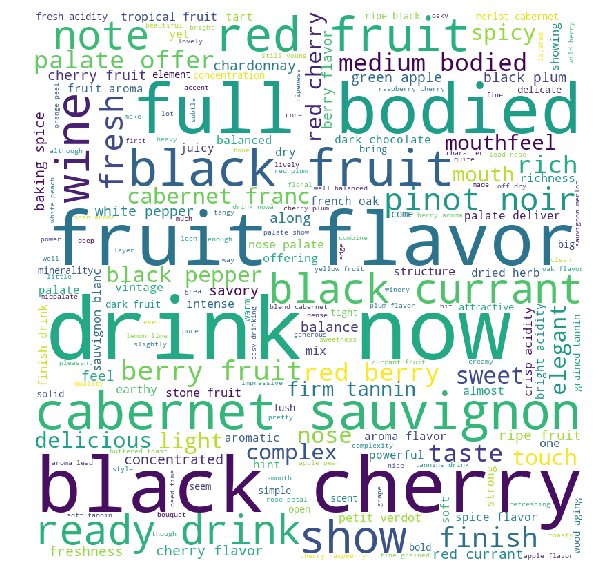

In [70]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in input: 
	comment_words += " "+val+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


## Getting some more insights for each variety of wine

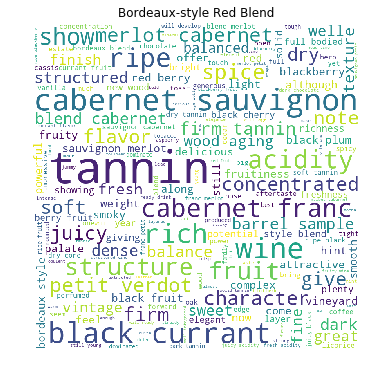

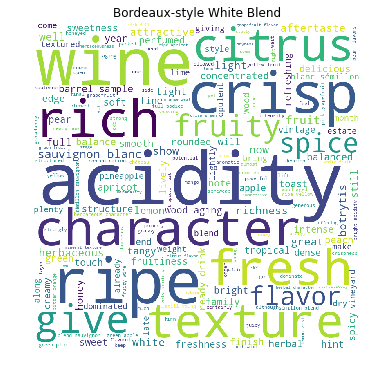

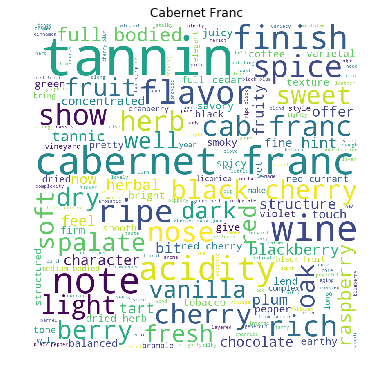

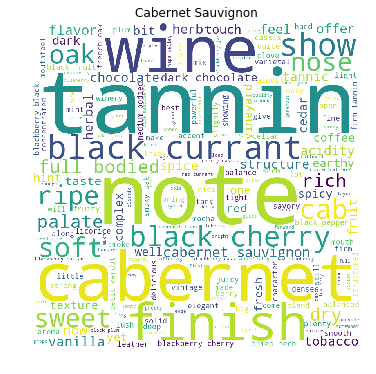

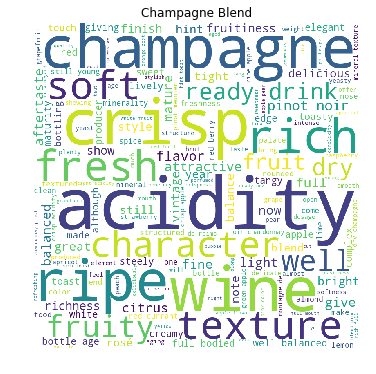

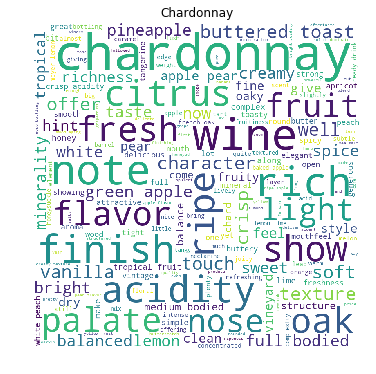

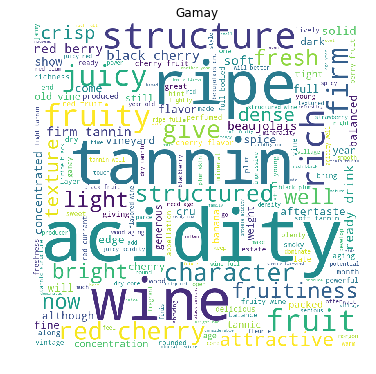

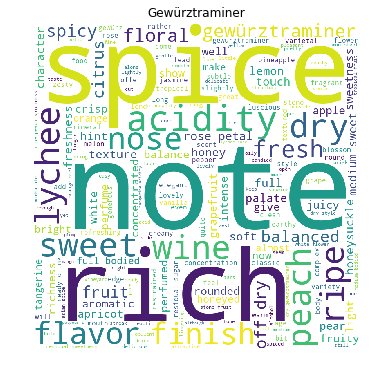

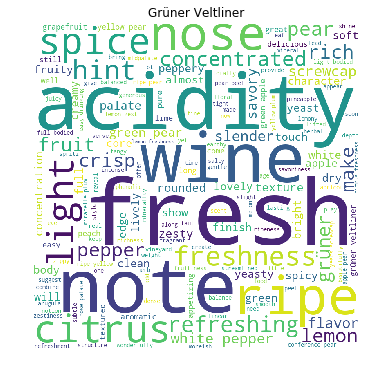

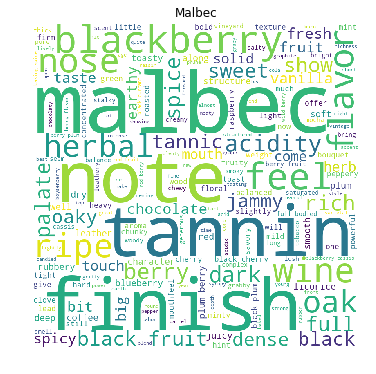

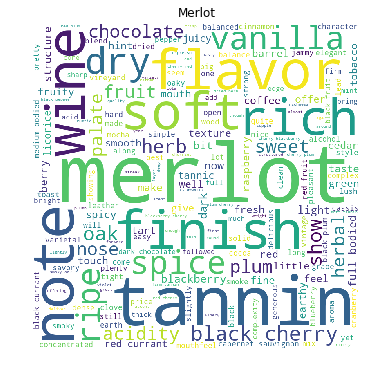

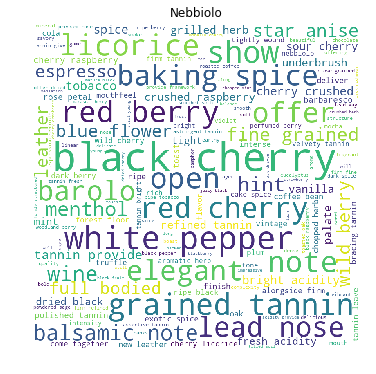

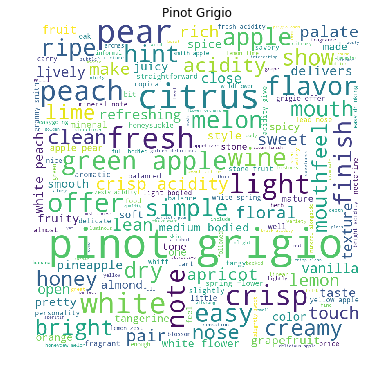

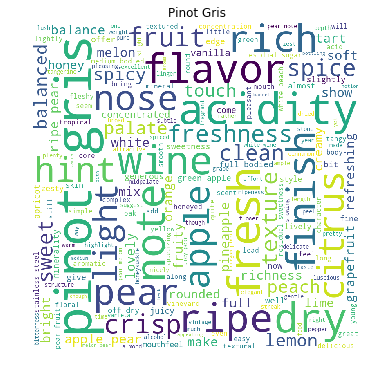

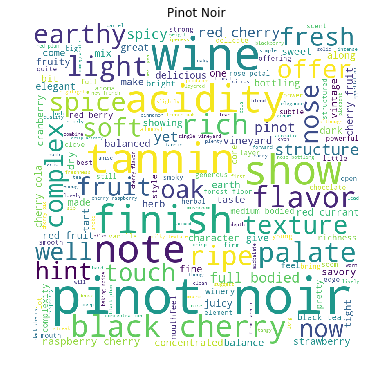

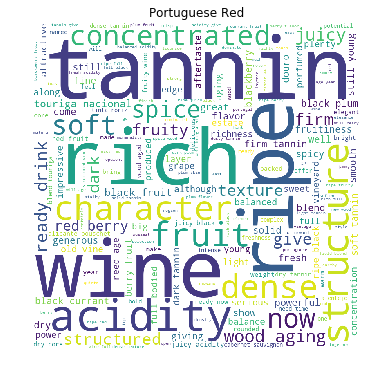

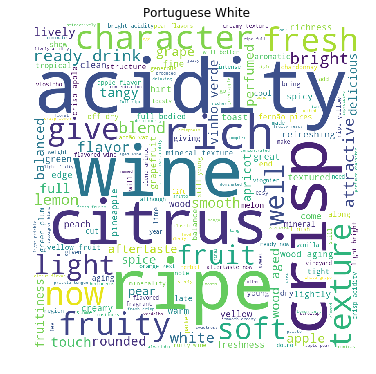

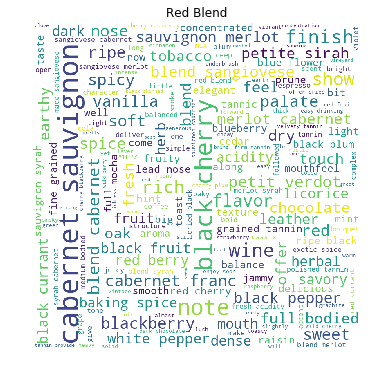

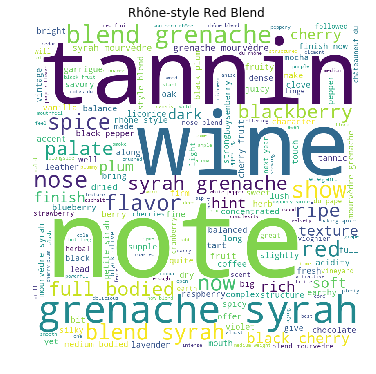

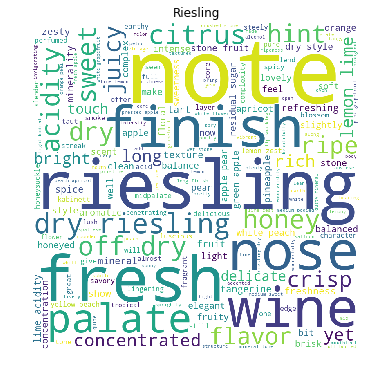

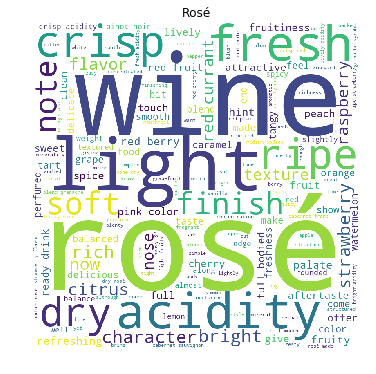

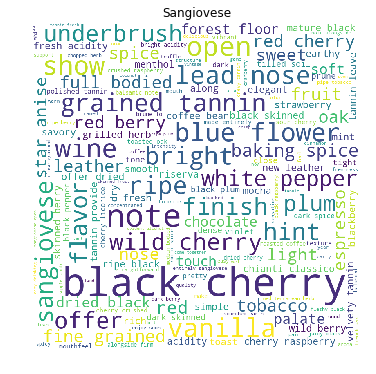

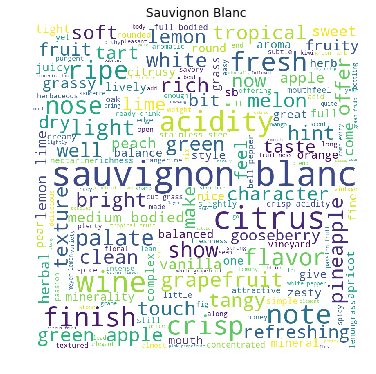

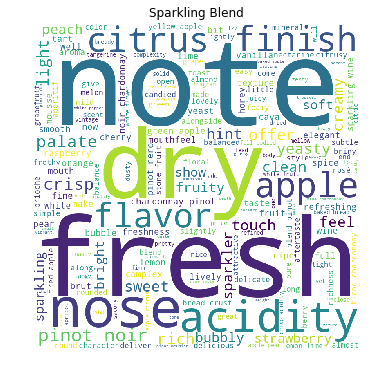

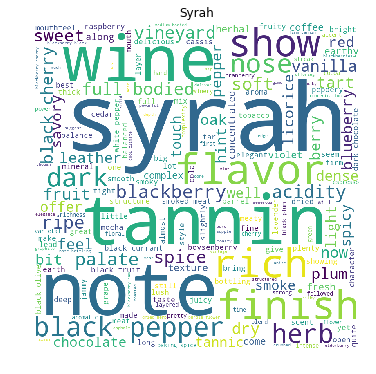

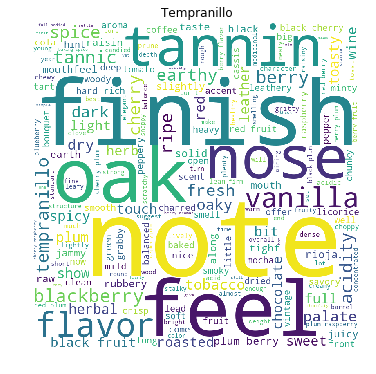

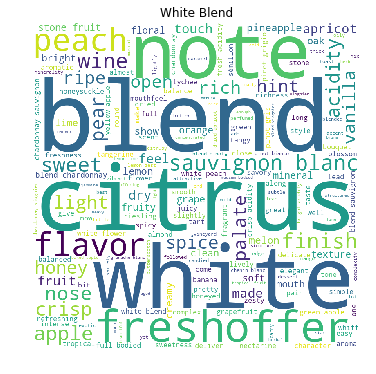

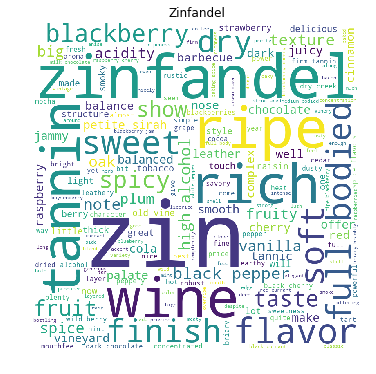

In [204]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

comment_words = ['']*28 
stopwords = set(STOPWORDS) 

for val in range(len(input)): 
	comment_words[output[val]]+= " "+input[val]+" "

x=labelEncoder.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27])
i=0
for w in comment_words:
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(w) 

    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.title(x[i])
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 
    i+=1

 Plotting the word cloud gives us significant insights about the descriptions of each wine, helping us pick out certain words or combinations of words that are specific to a particular wine variety. This can also help us spot some more high frequency neutral word like "wine", "drink", "now" which do not really point to any particular variety and simply add noise to the data. These words can be removed.

In [197]:
stp=['flavor','wine','finish','palate','aroma','drink','now','fruit']

In [198]:
for x in range(len(input)):
    print(x)
    s=input[x].split()
    s1=[]
    for i in s:
        if(i not in stp):
            s1.append(i)
    input[x]=' '.join(s1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078


3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123


6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6250
6251
6252
6253
6254
6255


8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8083
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8099
8100
8101
8102
8103
8104
8105
8106
8107
8108
8109
8110
8111
8112
8113
8114
8115
8116
8117
8118
8119
8120
8121
8122
8123
8124
8125
8126
8127
8128
8129
8130
8131
8132
8133
8134
8135
8136
8137
8138
8139
8140
8141
8142
8143
8144
8145
8146
8147
8148
8149
8150
8151
8152
8153
8154
8155
8156
8157
8158
8159
8160
8161
8162
8163
8164
8165
8166
8167
8168
8169
8170
8171
8172
8173
8174
8175
8176
8177
8178
8179
8180
8181
8182
8183
8184
8185
8186
8187
8188
8189
8190
8191
8192
8193
8194
8195
8196
8197
8198
8199
8200
8201
8202
8203
8204
8205
8206
8207
8208
8209
8210
8211
8212
8213
8214
8215
8216
8217
8218
8219
8220
8221
8222
8223
8224
8225
8226
8227
8228
8229
8230
8231
8232
8233
8234
8235
8236
8237
8238
8239
8240
8241
8242
8243
8244
8245
8246
8247
8248
8249
8250
8251
8252
8253
8254
8255
8256
8257
8258
8259
8260
8261
8262
8263
8264
8265
8266
8267
8268
8269
8270


9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999
10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
1

11366
11367
11368
11369
11370
11371
11372
11373
11374
11375
11376
11377
11378
11379
11380
11381
11382
11383
11384
11385
11386
11387
11388
11389
11390
11391
11392
11393
11394
11395
11396
11397
11398
11399
11400
11401
11402
11403
11404
11405
11406
11407
11408
11409
11410
11411
11412
11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
1153

12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
1298

14943
14944
14945
14946
14947
14948
14949
14950
14951
14952
14953
14954
14955
14956
14957
14958
14959
14960
14961
14962
14963
14964
14965
14966
14967
14968
14969
14970
14971
14972
14973
14974
14975
14976
14977
14978
14979
14980
14981
14982
14983
14984
14985
14986
14987
14988
14989
14990
14991
14992
14993
14994
14995
14996
14997
14998
14999
15000
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15050
15051
15052
15053
15054
15055
15056
15057
15058
15059
15060
15061
15062
15063
15064
15065
15066
15067
15068
15069
15070
15071
15072
15073
15074
15075
15076
15077
15078
15079
15080
15081
15082
15083
15084
15085
15086
15087
15088
15089
15090
15091
15092
15093
15094
15095
15096
15097
15098
15099
15100
15101
15102
15103
15104
15105
15106
15107
15108
1510

17201
17202
17203
17204
17205
17206
17207
17208
17209
17210
17211
17212
17213
17214
17215
17216
17217
17218
17219
17220
17221
17222
17223
17224
17225
17226
17227
17228
17229
17230
17231
17232
17233
17234
17235
17236
17237
17238
17239
17240
17241
17242
17243
17244
17245
17246
17247
17248
17249
17250
17251
17252
17253
17254
17255
17256
17257
17258
17259
17260
17261
17262
17263
17264
17265
17266
17267
17268
17269
17270
17271
17272
17273
17274
17275
17276
17277
17278
17279
17280
17281
17282
17283
17284
17285
17286
17287
17288
17289
17290
17291
17292
17293
17294
17295
17296
17297
17298
17299
17300
17301
17302
17303
17304
17305
17306
17307
17308
17309
17310
17311
17312
17313
17314
17315
17316
17317
17318
17319
17320
17321
17322
17323
17324
17325
17326
17327
17328
17329
17330
17331
17332
17333
17334
17335
17336
17337
17338
17339
17340
17341
17342
17343
17344
17345
17346
17347
17348
17349
17350
17351
17352
17353
17354
17355
17356
17357
17358
17359
17360
17361
17362
17363
17364
17365
17366
1736

18613
18614
18615
18616
18617
18618
18619
18620
18621
18622
18623
18624
18625
18626
18627
18628
18629
18630
18631
18632
18633
18634
18635
18636
18637
18638
18639
18640
18641
18642
18643
18644
18645
18646
18647
18648
18649
18650
18651
18652
18653
18654
18655
18656
18657
18658
18659
18660
18661
18662
18663
18664
18665
18666
18667
18668
18669
18670
18671
18672
18673
18674
18675
18676
18677
18678
18679
18680
18681
18682
18683
18684
18685
18686
18687
18688
18689
18690
18691
18692
18693
18694
18695
18696
18697
18698
18699
18700
18701
18702
18703
18704
18705
18706
18707
18708
18709
18710
18711
18712
18713
18714
18715
18716
18717
18718
18719
18720
18721
18722
18723
18724
18725
18726
18727
18728
18729
18730
18731
18732
18733
18734
18735
18736
18737
18738
18739
18740
18741
18742
18743
18744
18745
18746
18747
18748
18749
18750
18751
18752
18753
18754
18755
18756
18757
18758
18759
18760
18761
18762
18763
18764
18765
18766
18767
18768
18769
18770
18771
18772
18773
18774
18775
18776
18777
18778
1877

20135
20136
20137
20138
20139
20140
20141
20142
20143
20144
20145
20146
20147
20148
20149
20150
20151
20152
20153
20154
20155
20156
20157
20158
20159
20160
20161
20162
20163
20164
20165
20166
20167
20168
20169
20170
20171
20172
20173
20174
20175
20176
20177
20178
20179
20180
20181
20182
20183
20184
20185
20186
20187
20188
20189
20190
20191
20192
20193
20194
20195
20196
20197
20198
20199
20200
20201
20202
20203
20204
20205
20206
20207
20208
20209
20210
20211
20212
20213
20214
20215
20216
20217
20218
20219
20220
20221
20222
20223
20224
20225
20226
20227
20228
20229
20230
20231
20232
20233
20234
20235
20236
20237
20238
20239
20240
20241
20242
20243
20244
20245
20246
20247
20248
20249
20250
20251
20252
20253
20254
20255
20256
20257
20258
20259
20260
20261
20262
20263
20264
20265
20266
20267
20268
20269
20270
20271
20272
20273
20274
20275
20276
20277
20278
20279
20280
20281
20282
20283
20284
20285
20286
20287
20288
20289
20290
20291
20292
20293
20294
20295
20296
20297
20298
20299
20300
2030

21781
21782
21783
21784
21785
21786
21787
21788
21789
21790
21791
21792
21793
21794
21795
21796
21797
21798
21799
21800
21801
21802
21803
21804
21805
21806
21807
21808
21809
21810
21811
21812
21813
21814
21815
21816
21817
21818
21819
21820
21821
21822
21823
21824
21825
21826
21827
21828
21829
21830
21831
21832
21833
21834
21835
21836
21837
21838
21839
21840
21841
21842
21843
21844
21845
21846
21847
21848
21849
21850
21851
21852
21853
21854
21855
21856
21857
21858
21859
21860
21861
21862
21863
21864
21865
21866
21867
21868
21869
21870
21871
21872
21873
21874
21875
21876
21877
21878
21879
21880
21881
21882
21883
21884
21885
21886
21887
21888
21889
21890
21891
21892
21893
21894
21895
21896
21897
21898
21899
21900
21901
21902
21903
21904
21905
21906
21907
21908
21909
21910
21911
21912
21913
21914
21915
21916
21917
21918
21919
21920
21921
21922
21923
21924
21925
21926
21927
21928
21929
21930
21931
21932
21933
21934
21935
21936
21937
21938
21939
21940
21941
21942
21943
21944
21945
21946
2194

23927
23928
23929
23930
23931
23932
23933
23934
23935
23936
23937
23938
23939
23940
23941
23942
23943
23944
23945
23946
23947
23948
23949
23950
23951
23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963
23964
23965
23966
23967
23968
23969
23970
23971
23972
23973
23974
23975
23976
23977
23978
23979
23980
23981
23982
23983
23984
23985
23986
23987
23988
23989
23990
23991
23992
23993
23994
23995
23996
23997
23998
23999
24000
24001
24002
24003
24004
24005
24006
24007
24008
24009
24010
24011
24012
24013
24014
24015
24016
24017
24018
24019
24020
24021
24022
24023
24024
24025
24026
24027
24028
24029
24030
24031
24032
24033
24034
24035
24036
24037
24038
24039
24040
24041
24042
24043
24044
24045
24046
24047
24048
24049
24050
24051
24052
24053
24054
24055
24056
24057
24058
24059
24060
24061
24062
24063
24064
24065
24066
24067
24068
24069
24070
24071
24072
24073
24074
24075
24076
24077
24078
24079
24080
24081
24082
24083
24084
24085
24086
24087
24088
24089
24090
24091
24092
2409

25444
25445
25446
25447
25448
25449
25450
25451
25452
25453
25454
25455
25456
25457
25458
25459
25460
25461
25462
25463
25464
25465
25466
25467
25468
25469
25470
25471
25472
25473
25474
25475
25476
25477
25478
25479
25480
25481
25482
25483
25484
25485
25486
25487
25488
25489
25490
25491
25492
25493
25494
25495
25496
25497
25498
25499
25500
25501
25502
25503
25504
25505
25506
25507
25508
25509
25510
25511
25512
25513
25514
25515
25516
25517
25518
25519
25520
25521
25522
25523
25524
25525
25526
25527
25528
25529
25530
25531
25532
25533
25534
25535
25536
25537
25538
25539
25540
25541
25542
25543
25544
25545
25546
25547
25548
25549
25550
25551
25552
25553
25554
25555
25556
25557
25558
25559
25560
25561
25562
25563
25564
25565
25566
25567
25568
25569
25570
25571
25572
25573
25574
25575
25576
25577
25578
25579
25580
25581
25582
25583
25584
25585
25586
25587
25588
25589
25590
25591
25592
25593
25594
25595
25596
25597
25598
25599
25600
25601
25602
25603
25604
25605
25606
25607
25608
25609
2561

27530
27531
27532
27533
27534
27535
27536
27537
27538
27539
27540
27541
27542
27543
27544
27545
27546
27547
27548
27549
27550
27551
27552
27553
27554
27555
27556
27557
27558
27559
27560
27561
27562
27563
27564
27565
27566
27567
27568
27569
27570
27571
27572
27573
27574
27575
27576
27577
27578
27579
27580
27581
27582
27583
27584
27585
27586
27587
27588
27589
27590
27591
27592
27593
27594
27595
27596
27597
27598
27599
27600
27601
27602
27603
27604
27605
27606
27607
27608
27609
27610
27611
27612
27613
27614
27615
27616
27617
27618
27619
27620
27621
27622
27623
27624
27625
27626
27627
27628
27629
27630
27631
27632
27633
27634
27635
27636
27637
27638
27639
27640
27641
27642
27643
27644
27645
27646
27647
27648
27649
27650
27651
27652
27653
27654
27655
27656
27657
27658
27659
27660
27661
27662
27663
27664
27665
27666
27667
27668
27669
27670
27671
27672
27673
27674
27675
27676
27677
27678
27679
27680
27681
27682
27683
27684
27685
27686
27687
27688
27689
27690
27691
27692
27693
27694
27695
2769

29784
29785
29786
29787
29788
29789
29790
29791
29792
29793
29794
29795
29796
29797
29798
29799
29800
29801
29802
29803
29804
29805
29806
29807
29808
29809
29810
29811
29812
29813
29814
29815
29816
29817
29818
29819
29820
29821
29822
29823
29824
29825
29826
29827
29828
29829
29830
29831
29832
29833
29834
29835
29836
29837
29838
29839
29840
29841
29842
29843
29844
29845
29846
29847
29848
29849
29850
29851
29852
29853
29854
29855
29856
29857
29858
29859
29860
29861
29862
29863
29864
29865
29866
29867
29868
29869
29870
29871
29872
29873
29874
29875
29876
29877
29878
29879
29880
29881
29882
29883
29884
29885
29886
29887
29888
29889
29890
29891
29892
29893
29894
29895
29896
29897
29898
29899
29900
29901
29902
29903
29904
29905
29906
29907
29908
29909
29910
29911
29912
29913
29914
29915
29916
29917
29918
29919
29920
29921
29922
29923
29924
29925
29926
29927
29928
29929
29930
29931
29932
29933
29934
29935
29936
29937
29938
29939
29940
29941
29942
29943
29944
29945
29946
29947
29948
29949
2995

31915
31916
31917
31918
31919
31920
31921
31922
31923
31924
31925
31926
31927
31928
31929
31930
31931
31932
31933
31934
31935
31936
31937
31938
31939
31940
31941
31942
31943
31944
31945
31946
31947
31948
31949
31950
31951
31952
31953
31954
31955
31956
31957
31958
31959
31960
31961
31962
31963
31964
31965
31966
31967
31968
31969
31970
31971
31972
31973
31974
31975
31976
31977
31978
31979
31980
31981
31982
31983
31984
31985
31986
31987
31988
31989
31990
31991
31992
31993
31994
31995
31996
31997
31998
31999
32000
32001
32002
32003
32004
32005
32006
32007
32008
32009
32010
32011
32012
32013
32014
32015
32016
32017
32018
32019
32020
32021
32022
32023
32024
32025
32026
32027
32028
32029
32030
32031
32032
32033
32034
32035
32036
32037
32038
32039
32040
32041
32042
32043
32044
32045
32046
32047
32048
32049
32050
32051
32052
32053
32054
32055
32056
32057
32058
32059
32060
32061
32062
32063
32064
32065
32066
32067
32068
32069
32070
32071
32072
32073
32074
32075
32076
32077
32078
32079
32080
3208

33487
33488
33489
33490
33491
33492
33493
33494
33495
33496
33497
33498
33499
33500
33501
33502
33503
33504
33505
33506
33507
33508
33509
33510
33511
33512
33513
33514
33515
33516
33517
33518
33519
33520
33521
33522
33523
33524
33525
33526
33527
33528
33529
33530
33531
33532
33533
33534
33535
33536
33537
33538
33539
33540
33541
33542
33543
33544
33545
33546
33547
33548
33549
33550
33551
33552
33553
33554
33555
33556
33557
33558
33559
33560
33561
33562
33563
33564
33565
33566
33567
33568
33569
33570
33571
33572
33573
33574
33575
33576
33577
33578
33579
33580
33581
33582
33583
33584
33585
33586
33587
33588
33589
33590
33591
33592
33593
33594
33595
33596
33597
33598
33599
33600
33601
33602
33603
33604
33605
33606
33607
33608
33609
33610
33611
33612
33613
33614
33615
33616
33617
33618
33619
33620
33621
33622
33623
33624
33625
33626
33627
33628
33629
33630
33631
33632
33633
33634
33635
33636
33637
33638
33639
33640
33641
33642
33643
33644
33645
33646
33647
33648
33649
33650
33651
33652
3365

35937
35938
35939
35940
35941
35942
35943
35944
35945
35946
35947
35948
35949
35950
35951
35952
35953
35954
35955
35956
35957
35958
35959
35960
35961
35962
35963
35964
35965
35966
35967
35968
35969
35970
35971
35972
35973
35974
35975
35976
35977
35978
35979
35980
35981
35982
35983
35984
35985
35986
35987
35988
35989
35990
35991
35992
35993
35994
35995
35996
35997
35998
35999
36000
36001
36002
36003
36004
36005
36006
36007
36008
36009
36010
36011
36012
36013
36014
36015
36016
36017
36018
36019
36020
36021
36022
36023
36024
36025
36026
36027
36028
36029
36030
36031
36032
36033
36034
36035
36036
36037
36038
36039
36040
36041
36042
36043
36044
36045
36046
36047
36048
36049
36050
36051
36052
36053
36054
36055
36056
36057
36058
36059
36060
36061
36062
36063
36064
36065
36066
36067
36068
36069
36070
36071
36072
36073
36074
36075
36076
36077
36078
36079
36080
36081
36082
36083
36084
36085
36086
36087
36088
36089
36090
36091
36092
36093
36094
36095
36096
36097
36098
36099
36100
36101
36102
3610

37912
37913
37914
37915
37916
37917
37918
37919
37920
37921
37922
37923
37924
37925
37926
37927
37928
37929
37930
37931
37932
37933
37934
37935
37936
37937
37938
37939
37940
37941
37942
37943
37944
37945
37946
37947
37948
37949
37950
37951
37952
37953
37954
37955
37956
37957
37958
37959
37960
37961
37962
37963
37964
37965
37966
37967
37968
37969
37970
37971
37972
37973
37974
37975
37976
37977
37978
37979
37980
37981
37982
37983
37984
37985
37986
37987
37988
37989
37990
37991
37992
37993
37994
37995
37996
37997
37998
37999
38000
38001
38002
38003
38004
38005
38006
38007
38008
38009
38010
38011
38012
38013
38014
38015
38016
38017
38018
38019
38020
38021
38022
38023
38024
38025
38026
38027
38028
38029
38030
38031
38032
38033
38034
38035
38036
38037
38038
38039
38040
38041
38042
38043
38044
38045
38046
38047
38048
38049
38050
38051
38052
38053
38054
38055
38056
38057
38058
38059
38060
38061
38062
38063
38064
38065
38066
38067
38068
38069
38070
38071
38072
38073
38074
38075
38076
38077
3807

40109
40110
40111
40112
40113
40114
40115
40116
40117
40118
40119
40120
40121
40122
40123
40124
40125
40126
40127
40128
40129
40130
40131
40132
40133
40134
40135
40136
40137
40138
40139
40140
40141
40142
40143
40144
40145
40146
40147
40148
40149
40150
40151
40152
40153
40154
40155
40156
40157
40158
40159
40160
40161
40162
40163
40164
40165
40166
40167
40168
40169
40170
40171
40172
40173
40174
40175
40176
40177
40178
40179
40180
40181
40182
40183
40184
40185
40186
40187
40188
40189
40190
40191
40192
40193
40194
40195
40196
40197
40198
40199
40200
40201
40202
40203
40204
40205
40206
40207
40208
40209
40210
40211
40212
40213
40214
40215
40216
40217
40218
40219
40220
40221
40222
40223
40224
40225
40226
40227
40228
40229
40230
40231
40232
40233
40234
40235
40236
40237
40238
40239
40240
40241
40242
40243
40244
40245
40246
40247
40248
40249
40250
40251
40252
40253
40254
40255
40256
40257
40258
40259
40260
40261
40262
40263
40264
40265
40266
40267
40268
40269
40270
40271
40272
40273
40274
4027

42434
42435
42436
42437
42438
42439
42440
42441
42442
42443
42444
42445
42446
42447
42448
42449
42450
42451
42452
42453
42454
42455
42456
42457
42458
42459
42460
42461
42462
42463
42464
42465
42466
42467
42468
42469
42470
42471
42472
42473
42474
42475
42476
42477
42478
42479
42480
42481
42482
42483
42484
42485
42486
42487
42488
42489
42490
42491
42492
42493
42494
42495
42496
42497
42498
42499
42500
42501
42502
42503
42504
42505
42506
42507
42508
42509
42510
42511
42512
42513
42514
42515
42516
42517
42518
42519
42520
42521
42522
42523
42524
42525
42526
42527
42528
42529
42530
42531
42532
42533
42534
42535
42536
42537
42538
42539
42540
42541
42542
42543
42544
42545
42546
42547
42548
42549
42550
42551
42552
42553
42554
42555
42556
42557
42558
42559
42560
42561
42562
42563
42564
42565
42566
42567
42568
42569
42570
42571
42572
42573
42574
42575
42576
42577
42578
42579
42580
42581
42582
42583
42584
42585
42586
42587
42588
42589
42590
42591
42592
42593
42594
42595
42596
42597
42598
42599
4260

44184
44185
44186
44187
44188
44189
44190
44191
44192
44193
44194
44195
44196
44197
44198
44199
44200
44201
44202
44203
44204
44205
44206
44207
44208
44209
44210
44211
44212
44213
44214
44215
44216
44217
44218
44219
44220
44221
44222
44223
44224
44225
44226
44227
44228
44229
44230
44231
44232
44233
44234
44235
44236
44237
44238
44239
44240
44241
44242
44243
44244
44245
44246
44247
44248
44249
44250
44251
44252
44253
44254
44255
44256
44257
44258
44259
44260
44261
44262
44263
44264
44265
44266
44267
44268
44269
44270
44271
44272
44273
44274
44275
44276
44277
44278
44279
44280
44281
44282
44283
44284
44285
44286
44287
44288
44289
44290
44291
44292
44293
44294
44295
44296
44297
44298
44299
44300
44301
44302
44303
44304
44305
44306
44307
44308
44309
44310
44311
44312
44313
44314
44315
44316
44317
44318
44319
44320
44321
44322
44323
44324
44325
44326
44327
44328
44329
44330
44331
44332
44333
44334
44335
44336
44337
44338
44339
44340
44341
44342
44343
44344
44345
44346
44347
44348
44349
4435

46277
46278
46279
46280
46281
46282
46283
46284
46285
46286
46287
46288
46289
46290
46291
46292
46293
46294
46295
46296
46297
46298
46299
46300
46301
46302
46303
46304
46305
46306
46307
46308
46309
46310
46311
46312
46313
46314
46315
46316
46317
46318
46319
46320
46321
46322
46323
46324
46325
46326
46327
46328
46329
46330
46331
46332
46333
46334
46335
46336
46337
46338
46339
46340
46341
46342
46343
46344
46345
46346
46347
46348
46349
46350
46351
46352
46353
46354
46355
46356
46357
46358
46359
46360
46361
46362
46363
46364
46365
46366
46367
46368
46369
46370
46371
46372
46373
46374
46375
46376
46377
46378
46379
46380
46381
46382
46383
46384
46385
46386
46387
46388
46389
46390
46391
46392
46393
46394
46395
46396
46397
46398
46399
46400
46401
46402
46403
46404
46405
46406
46407
46408
46409
46410
46411
46412
46413
46414
46415
46416
46417
46418
46419
46420
46421
46422
46423
46424
46425
46426
46427
46428
46429
46430
46431
46432
46433
46434
46435
46436
46437
46438
46439
46440
46441
46442
4644

47765
47766
47767
47768
47769
47770
47771
47772
47773
47774
47775
47776
47777
47778
47779
47780
47781
47782
47783
47784
47785
47786
47787
47788
47789
47790
47791
47792
47793
47794
47795
47796
47797
47798
47799
47800
47801
47802
47803
47804
47805
47806
47807
47808
47809
47810
47811
47812
47813
47814
47815
47816
47817
47818
47819
47820
47821
47822
47823
47824
47825
47826
47827
47828
47829
47830
47831
47832
47833
47834
47835
47836
47837
47838
47839
47840
47841
47842
47843
47844
47845
47846
47847
47848
47849
47850
47851
47852
47853
47854
47855
47856
47857
47858
47859
47860
47861
47862
47863
47864
47865
47866
47867
47868
47869
47870
47871
47872
47873
47874
47875
47876
47877
47878
47879
47880
47881
47882
47883
47884
47885
47886
47887
47888
47889
47890
47891
47892
47893
47894
47895
47896
47897
47898
47899
47900
47901
47902
47903
47904
47905
47906
47907
47908
47909
47910
47911
47912
47913
47914
47915
47916
47917
47918
47919
47920
47921
47922
47923
47924
47925
47926
47927
47928
47929
47930
4793

49754
49755
49756
49757
49758
49759
49760
49761
49762
49763
49764
49765
49766
49767
49768
49769
49770
49771
49772
49773
49774
49775
49776
49777
49778
49779
49780
49781
49782
49783
49784
49785
49786
49787
49788
49789
49790
49791
49792
49793
49794
49795
49796
49797
49798
49799
49800
49801
49802
49803
49804
49805
49806
49807
49808
49809
49810
49811
49812
49813
49814
49815
49816
49817
49818
49819
49820
49821
49822
49823
49824
49825
49826
49827
49828
49829
49830
49831
49832
49833
49834
49835
49836
49837
49838
49839
49840
49841
49842
49843
49844
49845
49846
49847
49848
49849
49850
49851
49852
49853
49854
49855
49856
49857
49858
49859
49860
49861
49862
49863
49864
49865
49866
49867
49868
49869
49870
49871
49872
49873
49874
49875
49876
49877
49878
49879
49880
49881
49882
49883
49884
49885
49886
49887
49888
49889
49890
49891
49892
49893
49894
49895
49896
49897
49898
49899
49900
49901
49902
49903
49904
49905
49906
49907
49908
49909
49910
49911
49912
49913
49914
49915
49916
49917
49918
49919
4992

51577
51578
51579
51580
51581
51582
51583
51584
51585
51586
51587
51588
51589
51590
51591
51592
51593
51594
51595
51596
51597
51598
51599
51600
51601
51602
51603
51604
51605
51606
51607
51608
51609
51610
51611
51612
51613
51614
51615
51616
51617
51618
51619
51620
51621
51622
51623
51624
51625
51626
51627
51628
51629
51630
51631
51632
51633
51634
51635
51636
51637
51638
51639
51640
51641
51642
51643
51644
51645
51646
51647
51648
51649
51650
51651
51652
51653
51654
51655
51656
51657
51658
51659
51660
51661
51662
51663
51664
51665
51666
51667
51668
51669
51670
51671
51672
51673
51674
51675
51676
51677
51678
51679
51680
51681
51682
51683
51684
51685
51686
51687
51688
51689
51690
51691
51692
51693
51694
51695
51696
51697
51698
51699
51700
51701
51702
51703
51704
51705
51706
51707
51708
51709
51710
51711
51712
51713
51714
51715
51716
51717
51718
51719
51720
51721
51722
51723
51724
51725
51726
51727
51728
51729
51730
51731
51732
51733
51734
51735
51736
51737
51738
51739
51740
51741
51742
5174

53343
53344
53345
53346
53347
53348
53349
53350
53351
53352
53353
53354
53355
53356
53357
53358
53359
53360
53361
53362
53363
53364
53365
53366
53367
53368
53369
53370
53371
53372
53373
53374
53375
53376
53377
53378
53379
53380
53381
53382
53383
53384
53385
53386
53387
53388
53389
53390
53391
53392
53393
53394
53395
53396
53397
53398
53399
53400
53401
53402
53403
53404
53405
53406
53407
53408
53409
53410
53411
53412
53413
53414
53415
53416
53417
53418
53419
53420
53421
53422
53423
53424
53425
53426
53427
53428
53429
53430
53431
53432
53433
53434
53435
53436
53437
53438
53439
53440
53441
53442
53443
53444
53445
53446
53447
53448
53449
53450
53451
53452
53453
53454
53455
53456
53457
53458
53459
53460
53461
53462
53463
53464
53465
53466
53467
53468
53469
53470
53471
53472
53473
53474
53475
53476
53477
53478
53479
53480
53481
53482
53483
53484
53485
53486
53487
53488
53489
53490
53491
53492
53493
53494
53495
53496
53497
53498
53499
53500
53501
53502
53503
53504
53505
53506
53507
53508
5350

54777
54778
54779
54780
54781
54782
54783
54784
54785
54786
54787
54788
54789
54790
54791
54792
54793
54794
54795
54796
54797
54798
54799
54800
54801
54802
54803
54804
54805
54806
54807
54808
54809
54810
54811
54812
54813
54814
54815
54816
54817
54818
54819
54820
54821
54822
54823
54824
54825
54826
54827
54828
54829
54830
54831
54832
54833
54834
54835
54836
54837
54838
54839
54840
54841
54842
54843
54844
54845
54846
54847
54848
54849
54850
54851
54852
54853
54854
54855
54856
54857
54858
54859
54860
54861
54862
54863
54864
54865
54866
54867
54868
54869
54870
54871
54872
54873
54874
54875
54876
54877
54878
54879
54880
54881
54882
54883
54884
54885
54886
54887
54888
54889
54890
54891
54892
54893
54894
54895
54896
54897
54898
54899
54900
54901
54902
54903
54904
54905
54906
54907
54908
54909
54910
54911
54912
54913
54914
54915
54916
54917
54918
54919
54920
54921
54922
54923
54924
54925
54926
54927
54928
54929
54930
54931
54932
54933
54934
54935
54936
54937
54938
54939
54940
54941
54942
5494

56328
56329
56330
56331
56332
56333
56334
56335
56336
56337
56338
56339
56340
56341
56342
56343
56344
56345
56346
56347
56348
56349
56350
56351
56352
56353
56354
56355
56356
56357
56358
56359
56360
56361
56362
56363
56364
56365
56366
56367
56368
56369
56370
56371
56372
56373
56374
56375
56376
56377
56378
56379
56380
56381
56382
56383
56384
56385
56386
56387
56388
56389
56390
56391
56392
56393
56394
56395
56396
56397
56398
56399
56400
56401
56402
56403
56404
56405
56406
56407
56408
56409
56410
56411
56412
56413
56414
56415
56416
56417
56418
56419
56420
56421
56422
56423
56424
56425
56426
56427
56428
56429
56430
56431
56432
56433
56434
56435
56436
56437
56438
56439
56440
56441
56442
56443
56444
56445
56446
56447
56448
56449
56450
56451
56452
56453
56454
56455
56456
56457
56458
56459
56460
56461
56462
56463
56464
56465
56466
56467
56468
56469
56470
56471
56472
56473
56474
56475
56476
56477
56478
56479
56480
56481
56482
56483
56484
56485
56486
56487
56488
56489
56490
56491
56492
56493
5649

58187
58188
58189
58190
58191
58192
58193
58194
58195
58196
58197
58198
58199
58200
58201
58202
58203
58204
58205
58206
58207
58208
58209
58210
58211
58212
58213
58214
58215
58216
58217
58218
58219
58220
58221
58222
58223
58224
58225
58226
58227
58228
58229
58230
58231
58232
58233
58234
58235
58236
58237
58238
58239
58240
58241
58242
58243
58244
58245
58246
58247
58248
58249
58250
58251
58252
58253
58254
58255
58256
58257
58258
58259
58260
58261
58262
58263
58264
58265
58266
58267
58268
58269
58270
58271
58272
58273
58274
58275
58276
58277
58278
58279
58280
58281
58282
58283
58284
58285
58286
58287
58288
58289
58290
58291
58292
58293
58294
58295
58296
58297
58298
58299
58300
58301
58302
58303
58304
58305
58306
58307
58308
58309
58310
58311
58312
58313
58314
58315
58316
58317
58318
58319
58320
58321
58322
58323
58324
58325
58326
58327
58328
58329
58330
58331
58332
58333
58334
58335
58336
58337
58338
58339
58340
58341
58342
58343
58344
58345
58346
58347
58348
58349
58350
58351
58352
5835

59552
59553
59554
59555
59556
59557
59558
59559
59560
59561
59562
59563
59564
59565
59566
59567
59568
59569
59570
59571
59572
59573
59574
59575
59576
59577
59578
59579
59580
59581
59582
59583
59584
59585
59586
59587
59588
59589
59590
59591
59592
59593
59594
59595
59596
59597
59598
59599
59600
59601
59602
59603
59604
59605
59606
59607
59608
59609
59610
59611
59612
59613
59614
59615
59616
59617
59618
59619
59620
59621
59622
59623
59624
59625
59626
59627
59628
59629
59630
59631
59632
59633
59634
59635
59636
59637
59638
59639
59640
59641
59642
59643
59644
59645
59646
59647
59648
59649
59650
59651
59652
59653
59654
59655
59656
59657
59658
59659
59660
59661
59662
59663
59664
59665
59666
59667
59668
59669
59670
59671
59672
59673
59674
59675
59676
59677
59678
59679
59680
59681
59682
59683
59684
59685
59686
59687
59688
59689
59690
59691
59692
59693
59694
59695
59696
59697
59698
59699
59700
59701
59702
59703
59704
59705
59706
59707
59708
59709
59710
59711
59712
59713
59714
59715
59716
59717
5971

61370
61371
61372
61373
61374
61375
61376
61377
61378
61379
61380
61381
61382
61383
61384
61385
61386
61387
61388
61389
61390
61391
61392
61393
61394
61395
61396
61397
61398
61399
61400
61401
61402
61403
61404
61405
61406
61407
61408
61409
61410
61411
61412
61413
61414
61415
61416
61417
61418
61419
61420
61421
61422
61423
61424
61425
61426
61427
61428
61429
61430
61431
61432
61433
61434
61435
61436
61437
61438
61439
61440
61441
61442
61443
61444
61445
61446
61447
61448
61449
61450
61451
61452
61453
61454
61455
61456
61457
61458
61459
61460
61461
61462
61463
61464
61465
61466
61467
61468
61469
61470
61471
61472
61473
61474
61475
61476
61477
61478
61479
61480
61481
61482
61483
61484
61485
61486
61487
61488
61489
61490
61491
61492
61493
61494
61495
61496
61497
61498
61499
61500
61501
61502
61503
61504
61505
61506
61507
61508
61509
61510
61511
61512
61513
61514
61515
61516
61517
61518
61519
61520
61521
61522
61523
61524
61525
61526
61527
61528
61529
61530
61531
61532
61533
61534
61535
6153

63119
63120
63121
63122
63123
63124
63125
63126
63127
63128
63129
63130
63131
63132
63133
63134
63135
63136
63137
63138
63139
63140
63141
63142
63143
63144
63145
63146
63147
63148
63149
63150
63151
63152
63153
63154
63155
63156
63157
63158
63159
63160
63161
63162
63163
63164
63165
63166
63167
63168
63169
63170
63171
63172
63173
63174
63175
63176
63177
63178
63179
63180
63181
63182
63183
63184
63185
63186
63187
63188
63189
63190
63191
63192
63193
63194
63195
63196
63197
63198
63199
63200
63201
63202
63203
63204
63205
63206
63207
63208
63209
63210
63211
63212
63213
63214
63215
63216
63217
63218
63219
63220
63221
63222
63223
63224
63225
63226
63227
63228
63229
63230
63231
63232
63233
63234
63235
63236
63237
63238
63239
63240
63241
63242
63243
63244
63245
63246
63247
63248
63249
63250
63251
63252
63253
63254
63255
63256
63257
63258
63259
63260
63261
63262
63263
63264
63265
63266
63267
63268
63269
63270
63271
63272
63273
63274
63275
63276
63277
63278
63279
63280
63281
63282
63283
63284
6328

65173
65174
65175
65176
65177
65178
65179
65180
65181
65182
65183
65184
65185
65186
65187
65188
65189
65190
65191
65192
65193
65194
65195
65196
65197
65198
65199
65200
65201
65202
65203
65204
65205
65206
65207
65208
65209
65210
65211
65212
65213
65214
65215
65216
65217
65218
65219
65220
65221
65222
65223
65224
65225
65226
65227
65228
65229
65230
65231
65232
65233
65234
65235
65236
65237
65238
65239
65240
65241
65242
65243
65244
65245
65246
65247
65248
65249
65250
65251
65252
65253
65254
65255
65256
65257
65258
65259
65260
65261
65262
65263
65264
65265
65266
65267
65268
65269
65270
65271
65272
65273
65274
65275
65276
65277
65278
65279
65280
65281
65282
65283
65284
65285
65286
65287
65288
65289
65290
65291
65292
65293
65294
65295
65296
65297
65298
65299
65300
65301
65302
65303
65304
65305
65306
65307
65308
65309
65310
65311
65312
65313
65314
65315
65316
65317
65318
65319
65320
65321
65322
65323
65324
65325
65326
65327
65328
65329
65330
65331
65332
65333
65334
65335
65336
65337
65338
6533

66739
66740
66741
66742
66743
66744
66745
66746
66747
66748
66749
66750
66751
66752
66753
66754
66755
66756
66757
66758
66759
66760
66761
66762
66763
66764
66765
66766
66767
66768
66769
66770
66771
66772
66773
66774
66775
66776
66777
66778
66779
66780
66781
66782
66783
66784
66785
66786
66787
66788
66789
66790
66791
66792
66793
66794
66795
66796
66797
66798
66799
66800
66801
66802
66803
66804
66805
66806
66807
66808
66809
66810
66811
66812
66813
66814
66815
66816
66817
66818
66819
66820
66821
66822
66823
66824
66825
66826
66827
66828
66829
66830
66831
66832
66833
66834
66835
66836
66837
66838
66839
66840
66841
66842
66843
66844
66845
66846
66847
66848
66849
66850
66851
66852
66853
66854
66855
66856
66857
66858
66859
66860
66861
66862
66863
66864
66865
66866
66867
66868
66869
66870
66871
66872
66873
66874
66875
66876
66877
66878
66879
66880
66881
66882
66883
66884
66885
66886
66887
66888
66889
66890
66891
66892
66893
66894
66895
66896
66897
66898
66899
66900
66901
66902
66903
66904
6690

68218
68219
68220
68221
68222
68223
68224
68225
68226
68227
68228
68229
68230
68231
68232
68233
68234
68235
68236
68237
68238
68239
68240
68241
68242
68243
68244
68245
68246
68247
68248
68249
68250
68251
68252
68253
68254
68255
68256
68257
68258
68259
68260
68261
68262
68263
68264
68265
68266
68267
68268
68269
68270
68271
68272
68273
68274
68275
68276
68277
68278
68279
68280
68281
68282
68283
68284
68285
68286
68287
68288
68289
68290
68291
68292
68293
68294
68295
68296
68297
68298
68299
68300
68301
68302
68303
68304
68305
68306
68307
68308
68309
68310
68311
68312
68313
68314
68315
68316
68317
68318
68319
68320
68321
68322
68323
68324
68325
68326
68327
68328
68329
68330
68331
68332
68333
68334
68335
68336
68337
68338
68339
68340
68341
68342
68343
68344
68345
68346
68347
68348
68349
68350
68351
68352
68353
68354
68355
68356
68357
68358
68359
68360
68361
68362
68363
68364
68365
68366
68367
68368
68369
68370
68371
68372
68373
68374
68375
68376
68377
68378
68379
68380
68381
68382
68383
6838

69708
69709
69710
69711
69712
69713
69714
69715
69716
69717
69718
69719
69720
69721
69722
69723
69724
69725
69726
69727
69728
69729
69730
69731
69732
69733
69734
69735
69736
69737
69738
69739
69740
69741
69742
69743
69744
69745
69746
69747
69748
69749
69750
69751
69752
69753
69754
69755
69756
69757
69758
69759
69760
69761
69762
69763
69764
69765
69766
69767
69768
69769
69770
69771
69772
69773
69774
69775
69776
69777
69778
69779
69780
69781
69782
69783
69784
69785
69786
69787
69788
69789
69790
69791
69792
69793
69794
69795
69796
69797
69798
69799
69800
69801
69802
69803
69804
69805
69806
69807
69808
69809
69810
69811
69812
69813
69814
69815
69816
69817
69818
69819
69820
69821
69822
69823
69824
69825
69826
69827
69828
69829
69830
69831
69832
69833
69834
69835
69836
69837
69838
69839
69840
69841
69842
69843
69844
69845
69846
69847
69848
69849
69850
69851
69852
69853
69854
69855
69856
69857
69858
69859
69860
69861
69862
69863
69864
69865
69866
69867
69868
69869
69870
69871
69872
69873
6987

71793
71794
71795
71796
71797
71798
71799
71800
71801
71802
71803
71804
71805
71806
71807
71808
71809
71810
71811
71812
71813
71814
71815
71816
71817
71818
71819
71820
71821
71822
71823
71824
71825
71826
71827
71828
71829
71830
71831
71832
71833
71834
71835
71836
71837
71838
71839
71840
71841
71842
71843
71844
71845
71846
71847
71848
71849
71850
71851
71852
71853
71854
71855
71856
71857
71858
71859
71860
71861
71862
71863
71864
71865
71866
71867
71868
71869
71870
71871
71872
71873
71874
71875
71876
71877
71878
71879
71880
71881
71882
71883
71884
71885
71886
71887
71888
71889
71890
71891
71892
71893
71894
71895
71896
71897
71898
71899
71900
71901
71902
71903
71904
71905
71906
71907
71908
71909
71910
71911
71912
71913
71914
71915
71916
71917
71918
71919
71920
71921
71922
71923
71924
71925
71926
71927
71928
71929
71930
71931
71932
71933
71934
71935
71936
71937
71938
71939
71940
71941
71942
71943
71944
71945
71946
71947
71948
71949
71950
71951
71952
71953
71954
71955
71956
71957
71958
7195

73409
73410
73411
73412
73413
73414
73415
73416
73417
73418
73419
73420
73421
73422
73423
73424
73425
73426
73427
73428
73429
73430
73431
73432
73433
73434
73435
73436
73437
73438
73439
73440
73441
73442
73443
73444
73445
73446
73447
73448
73449
73450
73451
73452
73453
73454
73455
73456
73457
73458
73459
73460
73461
73462
73463
73464
73465
73466
73467
73468
73469
73470
73471
73472
73473
73474
73475
73476
73477
73478
73479
73480
73481
73482
73483
73484
73485
73486
73487
73488
73489
73490
73491
73492
73493
73494
73495
73496
73497
73498
73499
73500
73501
73502
73503
73504
73505
73506
73507
73508
73509
73510
73511
73512
73513
73514
73515
73516
73517
73518
73519
73520
73521
73522
73523
73524
73525
73526
73527
73528
73529
73530
73531
73532
73533
73534
73535
73536
73537
73538
73539
73540
73541
73542
73543
73544
73545
73546
73547
73548
73549
73550
73551
73552
73553
73554
73555
73556
73557
73558
73559
73560
73561
73562
73563
73564
73565
73566
73567
73568
73569
73570
73571
73572
73573
73574
7357

75391
75392
75393
75394
75395
75396
75397
75398
75399
75400
75401
75402
75403
75404
75405
75406
75407
75408
75409
75410
75411
75412
75413
75414
75415
75416
75417
75418
75419
75420
75421
75422
75423
75424
75425
75426
75427
75428
75429
75430
75431
75432
75433
75434
75435
75436
75437
75438
75439
75440
75441
75442
75443
75444
75445
75446
75447
75448
75449
75450
75451
75452
75453
75454
75455
75456
75457
75458
75459
75460
75461
75462
75463
75464
75465
75466
75467
75468
75469
75470
75471
75472
75473
75474
75475
75476
75477
75478
75479
75480
75481
75482
75483
75484
75485
75486
75487
75488
75489
75490
75491
75492
75493
75494
75495
75496
75497
75498
75499
75500
75501
75502
75503
75504
75505
75506
75507
75508
75509
75510
75511
75512
75513
75514
75515
75516
75517
75518
75519
75520
75521
75522
75523
75524
75525
75526
75527
75528
75529
75530
75531
75532
75533
75534
75535
75536
75537
75538
75539
75540
75541
75542
75543
75544
75545
75546
75547
75548
75549
75550
75551
75552
75553
75554
75555
75556
7555

77010
77011
77012
77013
77014
77015
77016
77017
77018
77019
77020
77021
77022
77023
77024
77025
77026
77027
77028
77029
77030
77031
77032
77033
77034
77035
77036
77037
77038
77039
77040
77041
77042
77043
77044
77045
77046
77047
77048
77049
77050
77051
77052
77053
77054
77055
77056
77057
77058
77059
77060
77061
77062
77063
77064
77065
77066
77067
77068
77069
77070
77071
77072
77073
77074
77075
77076
77077
77078
77079
77080
77081
77082
77083
77084
77085
77086
77087
77088
77089
77090
77091
77092
77093
77094
77095
77096
77097
77098
77099
77100
77101
77102
77103
77104
77105
77106
77107
77108
77109
77110
77111
77112
77113
77114
77115
77116
77117
77118
77119
77120
77121
77122
77123
77124
77125
77126
77127
77128
77129
77130
77131
77132
77133
77134
77135
77136
77137
77138
77139
77140
77141
77142
77143
77144
77145
77146
77147
77148
77149
77150
77151
77152
77153
77154
77155
77156
77157
77158
77159
77160
77161
77162
77163
77164
77165
77166
77167
77168
77169
77170
77171
77172
77173
77174
77175
7717

In [199]:
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2) 

In [200]:
vocab_size = 8000
embedding_dim = 16
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print(word_index)
sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(sequences)
max_len=len(X_train[0])
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test,maxlen=max_len)

{'<OOV>': 1, 'acidity': 2, 'cherry': 3, 'black': 4, 'ripe': 5, 'wine': 6, 'red': 7, 'tannin': 8, 'flavors': 9, 'finish': 10, 'spice': 11, 'note': 12, 'fruit': 13, 'dry': 14, 'oak': 15, 'rich': 16, 'berry': 17, 'full': 18, 'fresh': 19, 'nose': 20, 'plum': 21, 'show': 22, 'blend': 23, 'soft': 24, 'well': 25, 'apple': 26, 'blackberry': 27, 'sweet': 28, 'tannins': 29, 'light': 30, 'texture': 31, 'cabernet': 32, 'crisp': 33, 'offer': 34, 'dark': 35, 'palate': 36, 'bodied': 37, 'vanilla': 38, 'now': 39, 'raspberry': 40, 'hint': 41, 'citrus': 42, 'white': 43, 'pepper': 44, 'fruity': 45, 'bright': 46, 'touch': 47, 'juicy': 48, 'firm': 49, 'green': 50, 'give': 51, 'lemon': 52, 'will': 53, 'herb': 54, 'character': 55, 'chocolate': 56, 'balanced': 57, 'sauvignon': 58, 'structure': 59, 'currant': 60, 'pinot': 61, 'vineyard': 62, 'pear': 63, 'fine': 64, 'feel': 65, 'dried': 66, 'wood': 67, 'peach': 68, 'spicy': 69, 'smooth': 70, 'style': 71, 'merlot': 72, 'come': 73, 'tart': 74, 'medium': 75, 'made

In [201]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=len(X_train[0])),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(183, activation='relu'),
    tf.keras.layers.Dense(28, activation='sigmoid')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 79, 16)            128000    
_________________________________________________________________
flatten_17 (Flatten)         (None, 1264)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 183)               231495    
_________________________________________________________________
dense_39 (Dense)             (None, 28)                5152      
Total params: 364,647
Trainable params: 364,647
Non-trainable params: 0
_________________________________________________________________


In [202]:
num_epochs = 3
model.fit(X_train, y_train, epochs=num_epochs,validation_data=(X_test, y_test))

Train on 62102 samples, validate on 15526 samples
Epoch 1/3
62102/62102 [==============================] - 18s 296us/sample - loss: 1.8664 - acc: 0.4166 - val_loss: 1.2677 - val_acc: 0.6023
Epoch 2/3
62102/62102 [==============================] - 17s 278us/sample - loss: 1.0580 - acc: 0.6691 - val_loss: 1.1170 - val_acc: 0.6577
Epoch 3/3
62102/62102 [==============================] - 17s 281us/sample - loss: 0.8339 - acc: 0.7398 - val_loss: 1.1301 - val_acc: 0.6562


In [203]:
y_pred = model.predict(X_test)
y_pred1=[]
for i in range(len(y_pred)):
    y_pred1.append(np.argmax(y_pred[i]))
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
x=confusion_matrix(y_test,y_pred1)
for i in x:
    print(i)
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test, y_pred1))

[670   3   9  73   0   6   3   0   0   9   7   1   0   0  50  97   0 116
   0   0   9   0   0   0  12   0   0   2]
[ 5 72  0  0  2 41  0  1  1  0  0  0  0  0  0  0 17  0  0  9  5  0 34  0
  0  0  4  0]
[ 6  0 40 54  1  2  0  0  0  6  7  0  0  0 27  6  0 11  0  0  5  0  2  0
 19  3  0  7]
[  19    0    4 1016    0    4    0    0    0   70   16    1    0    0
   80    4    0   72    0    0    4    1    2    0   90   18    0   18]
[  0   0   0   0 120  30   0   0   0   0   0   0   0   0  11   2   3   0
   1   5  22   0   0  26   1   0   0   0]
[   5    6    0    4   18 1507    0    2   10    1    1    0   10    8
   14    2   22    1    0   36    8    0   79   25    7    0   22    1]
[16  0  1  0  4  2 30  0  0  0  0  0  0  0 48 21  0  2  0  0 24  0  0  0
  0  0  0  0]
[ 0  0  0  0  1 13  0 81  4  0  0  0  4  0  0  1  1  0  0 44  3  0  3  0
  0  0  3  0]
[  0   0   0   0   0  11   0   2 120   0   0   0   0   8   0   0   2   0
   0  21   1   0  15   4   0   0   2   0]
[ 14   0   0  50   0 

## Count Vectorization

In [269]:
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2) 

In [272]:
X_train[0]

<1x25117 sparse matrix of type '<class 'numpy.int64'>'
	with 31 stored elements in Compressed Sparse Row format>

In [270]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer()
X_train = countVectorizer.fit_transform(X_train)

AttributeError: lower not found

In [266]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu', input_dim=len(countVectorizer.get_feature_names())))
model.add(tf.keras.layers.Dense(56, activation='relu', input_dim=len(countVectorizer.get_feature_names())))
model.add(tf.keras.layers.Dense(units=28, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

NotFittedError: CountVectorizer - Vocabulary wasn't fitted.

In [261]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 100)               2511800   
_________________________________________________________________
dense_52 (Dense)             (None, 56)                5656      
_________________________________________________________________
dense_53 (Dense)             (None, 28)                1596      
Total params: 2,519,052
Trainable params: 2,519,052
Non-trainable params: 0
_________________________________________________________________


In [254]:
X_test = countVectorizer.transform(X_test)

In [263]:
model.fit(X_train, y_train, epochs=3, verbose=1,validation_data=(X_test,y_test))

Train on 62102 samples, validate on 15526 samples
Epoch 1/3
62102/62102 [==============================] - 62s 1ms/sample - loss: 0.2092 - acc: 0.9324 - val_loss: 1.5272 - val_acc: 0.6661
Epoch 2/3
62102/62102 [==============================] - 59s 950us/sample - loss: 0.1331 - acc: 0.9583 - val_loss: 1.7124 - val_acc: 0.6581
Epoch 3/3
62102/62102 [==============================] - 59s 958us/sample - loss: 0.0902 - acc: 0.9719 - val_loss: 1.8865 - val_acc: 0.6559


## Inferring from categorical and numeric data